# Pandas 한번에 제대로 배우기




---



- 관계 또는 레이블링 데이터로 쉽고 직관적으로 작업할 수 있도록 고안된 빠르고 유연하며 표현력이 뛰어난 데이터 구조를 제공하는 Python 패키지

## Pandas 특징
- 부동 소수점이 아닌 데이터 뿐만 아니라 부동 소수점 데이터에서도 결측 데이터(NaN)를 쉽게 처리
- 크기 변이성(Size mutability) : DataFrame 및 고차원 객체에서 열을 삽입 및 삭제 가능
- 자동 및 명시적(explicit) 데이터 정렬 : 객체를 라벨 집핳베 명시적으로 정렬하거나, 사용자가 라벨을 무시하고 Series, DataFrame 등의 계산에서 자동으로 데이터 조정 가능
- 데이터 세트에서 집계 및 변환을 위한 분할(split), 적용(apply), 결합(combine) 작업을 수행할 수 있는 강력하고 유연한 group-by 함수 제공
- 누락된 데이터 또는 다른 Python 및 NumPy 데이터 구조에서 서로 다른 인덱싱 데이터를 DataFrame 개체로 쉽게 변환
- 대용량 데이터 세트의 지능형 라벨 기반 슬라이싱, 고급 인덱싱 및 부분 집합 구하기 가능
- 직관적인 데이터 세트 병합 및 결합
- 데이터 세트의 유연한 재구성 및 피벗
- 축의 계층적 라벨링(눈금당 여러 개의 라벨을 가질 수 있음)
- 플랫 파일(csv 및 구분), Excel 파일, DB 로딩 및 초고속 HDF5 형식의 데이터 저장/로드에 사용되는 강력한 IO도구
- 시계열 특정 기능 : 날짜 범위 생성 및 주파수 변환, 무빙 윈도우 통계, 날짜 이동 및 지연

In [3]:
import numpy as np
import pandas as pd

## Pandas 객체


### Series 객체

In [2]:
s = pd.Series([0, 0.25, 0.5, 0.75, 1.0])
s

0    0.00
1    0.25
2    0.50
3    0.75
4    1.00
dtype: float64

In [3]:
s.values

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [4]:
s.index

RangeIndex(start=0, stop=5, step=1)

In [5]:
s[1:4]

1    0.25
2    0.50
3    0.75
dtype: float64

In [6]:
s = pd.Series([0, 0.25, 0.5, 0.75, 1],
             index=['a','b','c','d','e'])
s

a    0.00
b    0.25
c    0.50
d    0.75
e    1.00
dtype: float64

In [7]:
s['c']

0.5

In [8]:
s[['c','d','e']]

c    0.50
d    0.75
e    1.00
dtype: float64

In [9]:
'b' in s

True

In [10]:
s = pd.Series([0, 0.25, 0.5, 0.75, 1],
             index = [2, 4, 6, 8, 10])
s

2     0.00
4     0.25
6     0.50
8     0.75
10    1.00
dtype: float64

In [11]:
s[2:]

6     0.50
8     0.75
10    1.00
dtype: float64

In [12]:
s.unique()

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [13]:
s.value_counts()

0.00    1
1.00    1
0.50    1
0.75    1
0.25    1
dtype: int64

In [14]:
s.isin([0.25, 0.75])

2     False
4      True
6     False
8      True
10    False
dtype: bool

In [23]:
pop_tuple = {'서울' : 9720846,
            '부산' : 3404423,
            '인천' : 2947217,
            '대구' : 2427954,
            '대전' : 1471040,
            '광주' : 1455048}
population = pd.Series(pop_tuple)
population

서울    9720846
부산    3404423
인천    2947217
대구    2427954
대전    1471040
광주    1455048
dtype: int64

In [16]:
population['서울':'인천']

서울    9720846
부산    3404423
인천    2947217
dtype: int64

### DataFrame 객체

In [17]:
pd.DataFrame([{'A' : 2, 'B' : 4, 'D' : 3},
             {'A' : 4, 'B ' : 5, 'C' : 7}])

,A,B,D,B,C
0,2,4.0,3.0,NaN,NaN
1,4,NaN,NaN,5.0,7.0


In [18]:
pd.DataFrame(np.random.rand(5,5),
            columns = ['A','B','C','D','E'],
            index = [1,2,3,4,5])

,A,B,C,D,E
1,0.105044,0.328451,0.591976,0.548433,0.730881
2,0.478271,0.833749,0.653717,0.938448,0.171152
3,0.995110,0.452776,0.907881,0.049023,0.036803
4,0.328077,0.835033,0.890014,0.046079,0.334611
5,0.999865,0.559969,0.758625,0.446284,0.183023


In [21]:
male_tuple = {'서울' : 4732275,
            '부산' : 1668618,
            '인천' : 1476813,
            '대구' : 1198815,
            '대전' : 734441,
            '광주' : 720060}
male = pd.Series(male_tuple)
male

서울    4732275
부산    1668618
인천    1476813
대구    1198815
대전     734441
광주     720060
dtype: int64

In [22]:
female_tuple = {'서울' : 4988571,
            '부산' : 1735805,
            '인천' : 1470404,
            '대구' : 1229139,
            '대전' : 736599,
            '광주' : 734988}
female = pd.Series(female_tuple)
female

서울    4988571
부산    1735805
인천    1470404
대구    1229139
대전     736599
광주     734988
dtype: int64

In [26]:
korea_df = pd.DataFrame({'인구수' : population,
                       '남자' : male,
                       '여자' : female})
korea_df

,인구수,남자,여자
서울,9720846,4732275,4988571
부산,3404423,1668618,1735805
인천,2947217,1476813,1470404
대구,2427954,1198815,1229139
대전,1471040,734441,736599
광주,1455048,720060,734988


In [27]:
korea_df.index

Index(['서울', '부산', '인천', '대구', '대전', '광주'], dtype='object')

In [28]:
korea_df.columns

Index(['인구수', '남자', '여자'], dtype='object')

In [32]:
korea_df['서울':'인천']

,인구수,남자,여자
서울,9720846,4732275,4988571
부산,3404423,1668618,1735805
인천,2947217,1476813,1470404


### Index 객체


|클래스|설명|
|----|----------|
|Index|일반적인 Index 객체, NumPy 배열 형식으로 축의 이름 포현|
|Int64Index|정수 값을 위한 Index|
|MultiIndex|단일 축에 여러 단계 색인을 표현하는 계층적 Index 객체(튜플의 배열 유사)|
|DatatimeIndex|NumPy의 datetime64 타입으로 타임스탬프 저장|
|PeriodIndex|기간 데이터를 위한 Index|

In [34]:
idx = pd.Index([2,4,6,8,10])
idx

Int64Index([2, 4, 6, 8, 10], dtype='int64')

In [36]:
idx[1:2:2]

Int64Index([4], dtype='int64')

In [37]:
idx[-1::]

Int64Index([10], dtype='int64')

In [38]:
idx[::2]

Int64Index([2, 6, 10], dtype='int64')

In [39]:
print(idx.size)
print(idx.shape)
print(idx.ndim)
print(idx.dtype)

5
(5,)
1
int64


#### Index 연산

|연산자|메소드|설명
|--|----------|---------------|
||`append`|색인 객체를 추가한 새로운 색인 반환|
|`-`|`difference`|색인의 차집합 반환|
|`&`|`intersection`|색인의 교집합 반환|
|`l`|`union`|색인의 합집합 반환|
||`isin`|색인이 존재하는지 여부를 Boolean 배열로 반환|
||`delete`|색인이 삭제된 새로운 색인 반환|
||`drop`|값이 삭제된 새로운 색인 반환|
||`insert`|색인이 추가된 새로운 색인 반환|
||`is_monotonic`|색인이 단조성을 가지면 True|
||`is_unique`|중복되는 색인이 없다면 True|
||`unique`|색인에서 중복되는 요소를 제거하고 유일한 값만 반환|

In [43]:
idx1 = pd.Index([1,2,4,6,8])
idx2 = pd.Index([2,4,5,6,7])
print(idx1.append(idx2))
print(idx1.difference(idx2))  # idx1 - idx2
print(idx1.intersection(idx2))  # idx1 & idx2
print(idx1.union(idx2))
print(idx1.delete(0))
print(idx.drop(2))
print(idx1 ^ idx2)   # union - intersection

Int64Index([1, 2, 4, 6, 8, 2, 4, 5, 6, 7], dtype='int64')
Int64Index([1, 8], dtype='int64')
Int64Index([2, 4, 6], dtype='int64')
Int64Index([1, 2, 4, 5, 6, 7, 8], dtype='int64')
Int64Index([2, 4, 6, 8], dtype='int64')
Int64Index([4, 6, 8, 10], dtype='int64')
Int64Index([1, 5, 7, 8], dtype='int64')


<ipython-input-43-367db660c16b>:9: FutureWarning: Index.__xor__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__xor__.  Use index.symmetric_difference(other) instead
  print(idx1 ^ idx2)   # union - intersection


## 인덱싱(Indexing)

In [44]:
s = pd.Series([0, 0.25, 0.5, 0.75, 1.0],
             index=['a','b','c','d','e'])
s

a    0.00
b    0.25
c    0.50
d    0.75
e    1.00
dtype: float64

In [45]:
s['b']

0.25

In [46]:
'b' in s

True

In [47]:
s.keys()

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

In [48]:
list(s.items())

[('a', 0.0), ('b', 0.25), ('c', 0.5), ('d', 0.75), ('e', 1.0)]

In [49]:
s['f'] = 1.25

In [50]:
s['a':'e']

a    0.00
b    0.25
c    0.50
d    0.75
e    1.00
dtype: float64

In [51]:
s[0:4]

a    0.00
b    0.25
c    0.50
d    0.75
dtype: float64

In [52]:
s[(s > 0.4) & (s < 0.8)]

c    0.50
d    0.75
dtype: float64

In [53]:
s[['a','b','e']]

a    0.00
b    0.25
e    1.00
dtype: float64

### Series 인덱싱

In [54]:
s = pd.Series(['a','b','c','d','e'],
             index = [1, 3, 5, 7, 9])
s

1    a
3    b
5    c
7    d
9    e
dtype: object

In [55]:
s.iloc[1]

'b'

In [56]:
s.reindex(range(10))

0    NaN
1      a
2    NaN
3      b
4    NaN
5      c
6    NaN
7      d
8    NaN
9      e
dtype: object

In [57]:
s.reindex(range(10), method = 'bfill')

0    a
1    a
2    b
3    b
4    c
5    c
6    d
7    d
8    e
9    e
dtype: object

### DataFrame 인덱싱


|사용 방법|설명|
|-------|------|
|`df[val]`|하나의 컬럼 or 여러 컬럼 선택|
|`df.loc[val]`|라벨값으로 로우 부분집합 선택|
|`df.loc[:,val]`|라벨값으로 컬럼 부분집합 선택|
|`df.loc[val1, val2]`|라벨값으로 로우,컬럼 부분집합 선택|
|`df.iloc[where]`|정수 색인으로 로우 부분집합 선택|
|`df.iloc[:, where]`|정수 색인으로 컬럼 부분집합 선택|
|`df.iloc[where_i, where_j]`|정수 색인으로 로우,컬럼 부분집합 선택|
|`df.at[label_i, label_j]`|로우 컬럼 라벨로 단일 값 선택|
|`df.iat[i, j]`|로우 컬럼 정수 색인으로 단일 값 선택|
|`reindex`|하나 이상의 축을 새로운 색인으로 재색인|
|`get_value, set_value`|로우 컬럼 이름으로 값 선택|

In [58]:
korea_df['남자']

서울    4732275
부산    1668618
인천    1476813
대구    1198815
대전     734441
광주     720060
Name: 남자, dtype: int64

In [59]:
korea_df.남자

서울    4732275
부산    1668618
인천    1476813
대구    1198815
대전     734441
광주     720060
Name: 남자, dtype: int64

In [61]:
korea_df['남여비율'] = (korea_df['남자']*100 / korea_df['여자'])
korea_df

,인구수,남자,여자,남여비율
서울,9720846,4732275,4988571,94.862336
부산,3404423,1668618,1735805,96.129346
인천,2947217,1476813,1470404,100.435867
대구,2427954,1198815,1229139,97.532907
대전,1471040,734441,736599,99.707032
광주,1455048,720060,734988,97.968946


In [62]:
korea_df.values

array([[9.72084600e+06, 4.73227500e+06, 4.98857100e+06, 9.48623363e+01],
       [3.40442300e+06, 1.66861800e+06, 1.73580500e+06, 9.61293463e+01],
       [2.94721700e+06, 1.47681300e+06, 1.47040400e+06, 1.00435867e+02],
       [2.42795400e+06, 1.19881500e+06, 1.22913900e+06, 9.75329072e+01],
       [1.47104000e+06, 7.34441000e+05, 7.36599000e+05, 9.97070319e+01],
       [1.45504800e+06, 7.20060000e+05, 7.34988000e+05, 9.79689464e+01]])

In [63]:
korea_df.T

,서울,부산,인천,대구,대전,광주
인구수,9.720846e+06,3.404423e+06,2.947217e+06,2.427954e+06,1.471040e+06,1.455048e+06
남자,4.732275e+06,1.668618e+06,1.476813e+06,1.198815e+06,7.344410e+05,7.200600e+05
여자,4.988571e+06,1.735805e+06,1.470404e+06,1.229139e+06,7.365990e+05,7.349880e+05
남여비율,9.486234e+01,9.612935e+01,1.004359e+02,9.753291e+01,9.970703e+01,9.796895e+01


In [64]:
korea_df.values[2]

array([2.94721700e+06, 1.47681300e+06, 1.47040400e+06, 1.00435867e+02])

In [66]:
korea_df.loc[:'인천',:'남자']

,인구수,남자
서울,9720846,4732275
부산,3404423,1668618
인천,2947217,1476813


In [69]:
korea_df.loc[(korea_df.여자 > 1000000)]

,인구수,남자,여자,남여비율
서울,9720846,4732275,4988571,94.862336
부산,3404423,1668618,1735805,96.129346
인천,2947217,1476813,1470404,100.435867
대구,2427954,1198815,1229139,97.532907


In [70]:
korea_df.loc[(korea_df.인구수 > 2500000) & (korea_df.남여비율 > 100)]

,인구수,남자,여자,남여비율
인천,2947217,1476813,1470404,100.435867


In [71]:
korea_df.iloc[:3,:2]

,인구수,남자
서울,9720846,4732275
부산,3404423,1668618
인천,2947217,1476813


### 다중 인덱싱(Multi Indexing)

* 1차원의 Series와 2차원의 DataFrame 객체를 넘어 3차원, 4차원 이상의 고차원 데이터 처리
* 단일 인덱스 내에 여러 인덱스를 포함하는 다중 인덱싱

#### 다중 인덱스 Series

In [72]:
idx_tuples = [('서울', 2010), ('서울', 2020),
              ('부산', 2010), ('부산', 2020),
              ('인천', 2010), ('인천', 2020),
              ('대구', 2010), ('대구', 2020),
              ('대전', 2010), ('대전', 2020),
              ('광주', 2010), ('광주', 2020),]
idx_tuples

[('서울', 2010),
 ('서울', 2020),
 ('부산', 2010),
 ('부산', 2020),
 ('인천', 2010),
 ('인천', 2020),
 ('대구', 2010),
 ('대구', 2020),
 ('대전', 2010),
 ('대전', 2020),
 ('광주', 2010),
 ('광주', 2020)]

In [73]:
pop_tuples = [10312545, 9720846,
             2567910, 3404423,
             2758296, 2947217,
             2511676, 2427954,
             1503664, 1471040,
             1454636, 1455048]
population = pd.Series(pop_tuples, index = idx_tuples)
population

(서울, 2010)    10312545
(서울, 2020)     9720846
(부산, 2010)     2567910
(부산, 2020)     3404423
(인천, 2010)     2758296
(인천, 2020)     2947217
(대구, 2010)     2511676
(대구, 2020)     2427954
(대전, 2010)     1503664
(대전, 2020)     1471040
(광주, 2010)     1454636
(광주, 2020)     1455048
dtype: int64

In [74]:
midx = pd.MultiIndex.from_tuples(idx_tuples)
midx

MultiIndex([('서울', 2010),
            ('서울', 2020),
            ('부산', 2010),
            ('부산', 2020),
            ('인천', 2010),
            ('인천', 2020),
            ('대구', 2010),
            ('대구', 2020),
            ('대전', 2010),
            ('대전', 2020),
            ('광주', 2010),
            ('광주', 2020)],
           )

In [75]:
population = population.reindex(midx)
population

서울  2010    10312545
    2020     9720846
부산  2010     2567910
    2020     3404423
인천  2010     2758296
    2020     2947217
대구  2010     2511676
    2020     2427954
대전  2010     1503664
    2020     1471040
광주  2010     1454636
    2020     1455048
dtype: int64

In [76]:
population[:,2010]

서울    10312545
부산     2567910
인천     2758296
대구     2511676
대전     1503664
광주     1454636
dtype: int64

In [77]:
population['대전',:]

2010    1503664
2020    1471040
dtype: int64

In [78]:
korea_mdf = population.unstack()
korea_mdf

,2010,2020
광주,1454636,1455048
대구,2511676,2427954
대전,1503664,1471040
부산,2567910,3404423
서울,10312545,9720846
인천,2758296,2947217


In [79]:
korea_mdf.stack()

광주  2010     1454636
    2020     1455048
대구  2010     2511676
    2020     2427954
대전  2010     1503664
    2020     1471040
부산  2010     2567910
    2020     3404423
서울  2010    10312545
    2020     9720846
인천  2010     2758296
    2020     2947217
dtype: int64

In [87]:
male_tuples = [5111259, 4732275,
             1773170, 1668618,
             1390356, 1476813,
             1255245, 1198815,
             734648, 734441,
             721780, 720060]
male_tuples

[5111259,
 4732275,
 1773170,
 1668618,
 1390356,
 1476813,
 1255245,
 1198815,
 734648,
 734441,
 721780,
 720060]

In [84]:
female_tuples = [5201286, 4988571,
                1794740, 1735805,
                1367840, 1470404,
                1256431, 1229139,
                750016, 736599,
                732856, 734988]
female_tuples

[5201286,
 4988571,
 1794740,
 1735805,
 1367840,
 1470404,
 1256431,
 1229139,
 750016,
 736599,
 732856,
 734988]

In [90]:
ratio = korea_mdf['남자'] * 100 / korea_mdf['여자']
ratio

서울  2010     98.269140
    2020     94.862336
부산  2010     98.798155
    2020     96.129346
인천  2010    101.646099
    2020    100.435867
대구  2010     99.905606
    2020     97.532907
대전  2010     97.950977
    2020     99.707032
광주  2010     98.488653
    2020     97.968946
dtype: float64

In [91]:
ratio.unstack()

,2010,2020
광주,98.488653,97.968946
대구,99.905606,97.532907
대전,97.950977,99.707032
부산,98.798155,96.129346
서울,98.269140,94.862336
인천,101.646099,100.435867


In [92]:
korea_mdf = pd.DataFrame({'총인구수' : population,
                          '남자' : male_tuples,
                         '여자' : female_tuples,
                         '남여비율' : ratio})
korea_mdf

총인구수       남자       여자        남여비율
서울 2010  10312545  5111259  5201286   98.269140
   2020   9720846  4732275  4988571   94.862336
부산 2010   2567910  1773170  1794740   98.798155
   2020   3404423  1668618  1735805   96.129346
인천 2010   2758296  1390356  1367840  101.646099
   2020   2947217  1476813  1470404  100.435867
대구 2010   2511676  1255245  1256431   99.905606
   2020   2427954  1198815  1229139   97.532907
대전 2010   1503664   734648   750016   97.950977
   2020   1471040   734441   736599   99.707032
광주 2010   1454636   721780   732856   98.488653
   2020   1455048   720060   734988   97.968946

In [133]:
korea_mdf.index.names = ['행정구역','연도']

#### 다중 인덱스 생성

In [93]:
df = pd.DataFrame(np.random.rand(6, 3),
                 index=[['a','a','b','b','c','c'], [1, 2, 1, 2, 1, 2]],
                 columns=['c1','c2','c3'])
df

c1        c2        c3
a 1  0.844673  0.574210  0.532964
  2  0.929216  0.482657  0.417589
b 1  0.164838  0.860093  0.646536
  2  0.560037  0.405788  0.810293
c 1  0.384946  0.799090  0.082761
  2  0.805730  0.384901  0.264192

In [94]:
pd.MultiIndex.from_arrays([['a','a','b','b','c','c'], [1, 2, 1, 2, 1, 2]])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2),
            ('c', 1),
            ('c', 2)],
           )

In [95]:
pd.MultiIndex.from_product([['a','b','c'],[1,2]])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2),
            ('c', 1),
            ('c', 2)],
           )

In [97]:
pd.MultiIndex(levels = [['a','b','c'], [1,2]],
             codes = [[0,0,1,1,2,2], [0,1,0,1,0,1]])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2),
            ('c', 1),
            ('c', 2)],
           )

In [100]:
population

서울  2010    10312545
    2020     9720846
부산  2010     2567910
    2020     3404423
인천  2010     2758296
    2020     2947217
대구  2010     2511676
    2020     2427954
대전  2010     1503664
    2020     1471040
광주  2010     1454636
    2020     1455048
dtype: int64

In [101]:
population.index.names = ['행정구역', '연도']
population

행정구역  연도  
서울    2010    10312545
      2020     9720846
부산    2010     2567910
      2020     3404423
인천    2010     2758296
      2020     2947217
대구    2010     2511676
      2020     2427954
대전    2010     1503664
      2020     1471040
광주    2010     1454636
      2020     1455048
dtype: int64

In [103]:
idx = pd.MultiIndex.from_product([['a','b','c'],[1,2]],
                                names=['name1','name2'])
cols = pd.MultiIndex.from_product([['c1','c2','c3'], [1,2]],
                                 names=['col_name1','col_name2'])
data = np.round(np.random.randn(6,6),2)
mdf = pd.DataFrame(data, index=idx, columns = cols)
mdf

col_name1      c1          c2          c3      
col_name2       1     2     1     2     1     2
name1 name2                                    
a     1      0.32  0.77 -0.98  0.47  2.28 -0.85
      2     -0.70  1.90  0.60  0.10 -0.78  1.98
b     1     -0.09 -0.45  0.21 -0.05  0.37  1.01
      2      0.55  0.32 -0.24  0.04  0.20  0.38
c     1      0.63 -0.63 -1.07 -2.12 -0.51 -0.87
      2      0.25  0.09  1.43 -1.68 -0.61  0.18

In [104]:
mdf['c2']

col_name2       1     2
name1 name2            
a     1     -0.98  0.47
      2      0.60  0.10
b     1      0.21 -0.05
      2     -0.24  0.04
c     1     -1.07 -2.12
      2      1.43 -1.68

#### 인덱싱 및 슬라이싱

In [105]:
population['인천',2010]

2758296

In [106]:
population[:,2010]

행정구역
서울    10312545
부산     2567910
인천     2758296
대구     2511676
대전     1503664
광주     1454636
dtype: int64

In [107]:
population[population > 3000000]

행정구역  연도  
서울    2010    10312545
      2020     9720846
부산    2020     3404423
dtype: int64

In [108]:
population[['대구','대전']]

행정구역  연도  
대구    2010    2511676
      2020    2427954
대전    2010    1503664
      2020    1471040
dtype: int64

In [109]:
mdf['c2',1]

name1  name2
a      1       -0.98
       2        0.60
b      1        0.21
       2       -0.24
c      1       -1.07
       2        1.43
Name: (c2, 1), dtype: float64

In [110]:
mdf.iloc[:3, :4]

col_name1      c1          c2      
col_name2       1     2     1     2
name1 name2                        
a     1      0.32  0.77 -0.98  0.47
      2     -0.70  1.90  0.60  0.10
b     1     -0.09 -0.45  0.21 -0.05

In [111]:
mdf.loc[:,('c2',1)]

name1  name2
a      1       -0.98
       2        0.60
b      1        0.21
       2       -0.24
c      1       -1.07
       2        1.43
Name: (c2, 1), dtype: float64

In [113]:
idx_slice = pd.IndexSlice
mdf.loc[idx_slice[:,2], idx_slice[:,2]]

,col_name1,c1,c2,c3
,col_name2,2,2,2
name1,name2,,,
a,2,1.90,0.10,1.98
b,2,0.32,0.04,0.38
c,2,0.09,-1.68,0.18


#### 다중 인덱스 재정렬

In [114]:
idx

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2),
            ('c', 1),
            ('c', 2)],
           names=['name1', 'name2'])

In [118]:
korea_mdf

총인구수       남자       여자        남여비율
서울 2010  10312545  5111259  5201286   98.269140
   2020   9720846  4732275  4988571   94.862336
부산 2010   2567910  1773170  1794740   98.798155
   2020   3404423  1668618  1735805   96.129346
인천 2010   2758296  1390356  1367840  101.646099
   2020   2947217  1476813  1470404  100.435867
대구 2010   2511676  1255245  1256431   99.905606
   2020   2427954  1198815  1229139   97.532907
대전 2010   1503664   734648   750016   97.950977
   2020   1471040   734441   736599   99.707032
광주 2010   1454636   721780   732856   98.488653
   2020   1455048   720060   734988   97.968946

In [119]:
korea_mdf = korea_mdf.sort_index()
korea_mdf

총인구수       남자       여자        남여비율
광주 2010   1454636   721780   732856   98.488653
   2020   1455048   720060   734988   97.968946
대구 2010   2511676  1255245  1256431   99.905606
   2020   2427954  1198815  1229139   97.532907
대전 2010   1503664   734648   750016   97.950977
   2020   1471040   734441   736599   99.707032
부산 2010   2567910  1773170  1794740   98.798155
   2020   3404423  1668618  1735805   96.129346
서울 2010  10312545  5111259  5201286   98.269140
   2020   9720846  4732275  4988571   94.862336
인천 2010   2758296  1390356  1367840  101.646099
   2020   2947217  1476813  1470404  100.435867

In [121]:
korea_mdf['대구':'부산']

총인구수       남자       여자       남여비율
대구 2010  2511676  1255245  1256431  99.905606
   2020  2427954  1198815  1229139  97.532907
대전 2010  1503664   734648   750016  97.950977
   2020  1471040   734441   736599  99.707032
부산 2010  2567910  1773170  1794740  98.798155
   2020  3404423  1668618  1735805  96.129346

In [122]:
korea_mdf.unstack(level=0)

총인구수                                                    남자           \
           광주       대구       대전       부산        서울       인천      광주       대구   
2010  1454636  2511676  1503664  2567910  10312545  2758296  721780  1255245   
2020  1455048  2427954  1471040  3404423   9720846  2947217  720060  1198815   

                       ...      여자                                  남여비율  \
          대전       부산  ...      대전       부산       서울       인천         광주   
2010  734648  1773170  ...  750016  1794740  5201286  1367840  98.488653   
2020  734441  1668618  ...  736599  1735805  4988571  1470404  97.968946   

                                                              
             대구         대전         부산         서울          인천  
2010  99.905606  97.950977  98.798155  98.269140  101.646099  
2020  97.532907  99.707032  96.129346  94.862336  100.435867  

[2 rows x 24 columns]

In [123]:
korea_mdf.unstack(level=1)

총인구수                남자                여자                 남여비율  \
        2010     2020     2010     2020     2010     2020        2010   
광주   1454636  1455048   721780   720060   732856   734988   98.488653   
대구   2511676  2427954  1255245  1198815  1256431  1229139   99.905606   
대전   1503664  1471040   734648   734441   750016   736599   97.950977   
부산   2567910  3404423  1773170  1668618  1794740  1735805   98.798155   
서울  10312545  9720846  5111259  4732275  5201286  4988571   98.269140   
인천   2758296  2947217  1390356  1476813  1367840  1470404  101.646099   

                
          2020  
광주   97.968946  
대구   97.532907  
대전   99.707032  
부산   96.129346  
서울   94.862336  
인천  100.435867

In [134]:
idx_flat = korea_mdf.reset_index(level=0)
idx_flat

,행정구역,총인구수,남자,여자,남여비율
연도,,,,,
2010,광주,1454636,721780,732856,98.488653
2020,광주,1455048,720060,734988,97.968946
2010,대구,2511676,1255245,1256431,99.905606
2020,대구,2427954,1198815,1229139,97.532907
2010,대전,1503664,734648,750016,97.950977
2020,대전,1471040,734441,736599,99.707032
2010,부산,2567910,1773170,1794740,98.798155
2020,부산,3404423,1668618,1735805,96.129346
2010,서울,10312545,5111259,5201286,98.269140


In [135]:
idx_flat = korea_mdf.reset_index(level=(0, 1))
idx_flat

,행정구역,연도,총인구수,남자,여자,남여비율
0,광주,2010,1454636,721780,732856,98.488653
1,광주,2020,1455048,720060,734988,97.968946
2,대구,2010,2511676,1255245,1256431,99.905606
3,대구,2020,2427954,1198815,1229139,97.532907
4,대전,2010,1503664,734648,750016,97.950977
5,대전,2020,1471040,734441,736599,99.707032
6,부산,2010,2567910,1773170,1794740,98.798155
7,부산,2020,3404423,1668618,1735805,96.129346
8,서울,2010,10312545,5111259,5201286,98.269140
9,서울,2020,9720846,4732275,4988571,94.862336


In [136]:
idx_flat.set_index(['행정구역','연도'])

총인구수       남자       여자        남여비율
행정구역 연도                                          
광주   2010   1454636   721780   732856   98.488653
     2020   1455048   720060   734988   97.968946
대구   2010   2511676  1255245  1256431   99.905606
     2020   2427954  1198815  1229139   97.532907
대전   2010   1503664   734648   750016   97.950977
     2020   1471040   734441   736599   99.707032
부산   2010   2567910  1773170  1794740   98.798155
     2020   3404423  1668618  1735805   96.129346
서울   2010  10312545  5111259  5201286   98.269140
     2020   9720846  4732275  4988571   94.862336
인천   2010   2758296  1390356  1367840  101.646099
     2020   2947217  1476813  1470404  100.435867

## 데이터 연산

In [137]:
s = pd.Series(np.random.randint(0, 10, 5))
s

0    0
1    0
2    5
3    4
4    5
dtype: int32

In [138]:
df = pd.DataFrame(np.random.randint(0, 10, (3, 3)),
                 columns = ['A','B','C'])
df

,A,B,C
0,6,9,1
1,9,0,7
2,0,0,9


In [139]:
np.exp(s)

0      1.000000
1      1.000000
2    148.413159
3     54.598150
4    148.413159
dtype: float64

In [140]:
np.cos(df * np.pi / 4)

,A,B,C
0,-1.836970e-16,0.707107,0.707107
1,7.071068e-01,1.000000,0.707107
2,1.000000e+00,1.000000,0.707107


In [141]:
s1 = pd.Series([1,3,5,7,9], index=[0,1,2,3,4])
s2 = pd.Series([2,4,6,8,10], index=[1,2,3,4,5])
s1+s2

0     NaN
1     5.0
2     9.0
3    13.0
4    17.0
5     NaN
dtype: float64

In [142]:
s1.add(s2, fill_value = 0)

0     1.0
1     5.0
2     9.0
3    13.0
4    17.0
5    10.0
dtype: float64

In [143]:
df1 = pd.DataFrame(np.random.randint(0,20,(3,3)),
                  columns = list('ACD'))
df1

,A,C,D
0,6,3,14
1,10,18,6
2,10,12,10


In [144]:
df2 = pd.DataFrame(np.random.randint(0,20,(5,5)),
                  columns = list('BAECD'))
df2

,B,A,E,C,D
0,4,13,8,13,6
1,15,12,1,14,7
2,11,1,0,14,18
3,6,9,15,5,14
4,18,3,8,14,19


In [145]:
df1 + df2

,A,B,C,D,E
0,19.0,NaN,16.0,20.0,NaN
1,22.0,NaN,32.0,13.0,NaN
2,11.0,NaN,26.0,28.0,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN


In [146]:
fvalue = df1.stack().mean()
df1.add(df2, fill_value = fvalue)

,A,B,C,D,E
0,19.000000,13.888889,16.000000,20.000000,17.888889
1,22.000000,24.888889,32.000000,13.000000,10.888889
2,11.000000,20.888889,26.000000,28.000000,9.888889
3,18.888889,15.888889,14.888889,23.888889,24.888889
4,12.888889,27.888889,23.888889,28.888889,17.888889


### 연산자 범용 함수


|Python 연산자|Pandas 메소드|
|---|-----------------------|
|`+`|`add`,`radd`|
|`-`|`sub`,`rsub`,`subtract`|
|`*`|`mul`,`rmul`,`multiply`|
|`/`|`truediv`,`div`,`rdiv`,`divide`|
|`//`|`floordiv`,`rfloordiv`|
|`%`|`mod`|
|`**`|`pow`,`rpow`|

#### add()

In [147]:
a = np.random.randint(1,10,size=(3,3))
a

array([[5, 1, 4],
       [4, 7, 6],
       [2, 7, 6]])

In [148]:
a + a[0]

array([[10,  2,  8],
       [ 9,  8, 10],
       [ 7,  8, 10]])

In [149]:
df = pd.DataFrame(a, columns = list('ABC'))
df

,A,B,C
0,5,1,4
1,4,7,6
2,2,7,6


In [150]:
df + df.iloc[0]

,A,B,C
0,10,2,8
1,9,8,10
2,7,8,10


In [151]:
df.add(df.iloc[0])

,A,B,C
0,10,2,8
1,9,8,10
2,7,8,10


#### sub() / subtract()

In [152]:
a

array([[5, 1, 4],
       [4, 7, 6],
       [2, 7, 6]])

In [153]:
a - a[0]

array([[ 0,  0,  0],
       [-1,  6,  2],
       [-3,  6,  2]])

In [154]:
df - df.iloc[0]

,A,B,C
0,0,0,0
1,-1,6,2
2,-3,6,2


In [155]:
df.sub(df.iloc[0])

,A,B,C
0,0,0,0
1,-1,6,2
2,-3,6,2


In [156]:
df.subtract(df['B'], axis = 0)

,A,B,C
0,4,0,3
1,-3,0,-1
2,-5,0,-1


#### mul() / multply()




In [157]:
a

array([[5, 1, 4],
       [4, 7, 6],
       [2, 7, 6]])

In [158]:
a * a[0]

array([[25,  1, 16],
       [20,  7, 24],
       [10,  7, 24]])

In [159]:
df

,A,B,C
0,5,1,4
1,4,7,6
2,2,7,6


In [160]:
df * df.iloc[1]

,A,B,C
0,20,7,24
1,16,49,36
2,8,49,36


In [161]:
df.mul(df.iloc[1])

,A,B,C
0,20,7,24
1,16,49,36
2,8,49,36


In [162]:
df.multiply(df.iloc[1])

,A,B,C
0,20,7,24
1,16,49,36
2,8,49,36


#### truediv() /  div() / divide() / floordiv()

In [163]:
a / a[0]

array([[1. , 1. , 1. ],
       [0.8, 7. , 1.5],
       [0.4, 7. , 1.5]])

In [164]:
df

,A,B,C
0,5,1,4
1,4,7,6
2,2,7,6


In [165]:
df / df.iloc[0]

,A,B,C
0,1.0,1.0,1.0
1,0.8,7.0,1.5
2,0.4,7.0,1.5


In [166]:
df.truediv(df.iloc[0])

,A,B,C
0,1.0,1.0,1.0
1,0.8,7.0,1.5
2,0.4,7.0,1.5


In [167]:
df.div(df.iloc[1])

,A,B,C
0,1.25,0.142857,0.666667
1,1.00,1.000000,1.000000
2,0.50,1.000000,1.000000


In [168]:
df.divide(df.iloc[2])

,A,B,C
0,2.5,0.142857,0.666667
1,2.0,1.000000,1.000000
2,1.0,1.000000,1.000000


In [169]:
a // a[0]

array([[1, 1, 1],
       [0, 7, 1],
       [0, 7, 1]], dtype=int32)

In [170]:
df.floordiv(df.iloc[0])

,A,B,C
0,1,1,1
1,0,7,1
2,0,7,1


#### mod()

In [171]:
a

array([[5, 1, 4],
       [4, 7, 6],
       [2, 7, 6]])

In [172]:
a % a[0]

array([[0, 0, 0],
       [4, 0, 2],
       [2, 0, 2]], dtype=int32)

In [173]:
df

,A,B,C
0,5,1,4
1,4,7,6
2,2,7,6


In [174]:
df.mod(df.iloc[0])

,A,B,C
0,0,0,0
1,4,0,2
2,2,0,2


#### pow()

In [175]:
a ** a[0]

array([[3125,    1,  256],
       [1024,    7, 1296],
       [  32,    7, 1296]], dtype=int32)

In [176]:
df.pow(df.iloc[0])

,A,B,C
0,3125,1,256
1,1024,7,1296
2,32,7,1296


In [177]:
row = df.iloc[0,::2]
row

A    5
C    4
Name: 0, dtype: int32

In [178]:
df - row

,A,B,C
0,0.0,NaN,0.0
1,-1.0,NaN,2.0
2,-3.0,NaN,2.0


### 정렬(Sort)

In [179]:
s = pd.Series(range(5), index=['A','D','B','C','E'])
s

A    0
D    1
B    2
C    3
E    4
dtype: int64

In [180]:
s.sort_index()

A    0
B    2
C    3
D    1
E    4
dtype: int64

In [181]:
s.sort_values()

A    0
D    1
B    2
C    3
E    4
dtype: int64

In [183]:
df = pd.DataFrame(np.random.randint(0, 10, (4, 4)),
                 index = [2, 4, 1, 3],
                 columns = list('BDAC'))
df

,B,D,A,C
2,6,3,2,1
4,4,0,3,6
1,0,7,5,9
3,3,9,7,7


In [184]:
df.sort_index()

,B,D,A,C
1,0,7,5,9
2,6,3,2,1
3,3,9,7,7
4,4,0,3,6


In [185]:
df.sort_values(by='A')

,B,D,A,C
2,6,3,2,1
4,4,0,3,6
1,0,7,5,9
3,3,9,7,7


In [186]:
df.sort_values(by=['A','C'])

,B,D,A,C
2,6,3,2,1
4,4,0,3,6
1,0,7,5,9
3,3,9,7,7


In [187]:
df.sort_index(axis = 1)

,A,B,C,D
2,2,6,1,3
4,3,4,6,0
1,5,0,9,7
3,7,3,7,9


### 순위(Ranking)


|메소드|설명|
|-----|------------------------|
|`average`|기본값. 순위에 같은 값을 가지는 항목들의 평균값 사용|
|`min`|같은 값을 가지는 그룹을 낮은 순위로 지정|
|`max`|같은 값을 가지는 그룹을 높은 순위로 지정|
|`first`|데이터 내의 위치에 따라 순위 지정|
|`dense`|같은 그룹 내에서 모두 같은 순위를 적용하지 않고 1씩 증가|

In [188]:
s = pd.Series([-2,4,7,3,0,7,4,-7,3,8])
s

0   -2
1    4
2    7
3    3
4    0
5    7
6    4
7   -7
8    3
9    8
dtype: int64

In [189]:
s.rank()

0     2.0
1     6.5
2     8.5
3     4.5
4     3.0
5     8.5
6     6.5
7     1.0
8     4.5
9    10.0
dtype: float64

In [190]:
s.rank(method = 'first')

0     2.0
1     6.0
2     8.0
3     4.0
4     3.0
5     9.0
6     7.0
7     1.0
8     5.0
9    10.0
dtype: float64

In [191]:
s.rank(method = 'max')

0     2.0
1     7.0
2     9.0
3     5.0
4     3.0
5     9.0
6     7.0
7     1.0
8     5.0
9    10.0
dtype: float64

### 고성능 연산

In [193]:
nrows, ncols = 100000, 100
df1, df2, df3, df4 = (pd.DataFrame(np.random.rand(nrows,ncols)) for i in range(4))

In [194]:
%timeit df1 + df2 + df3 + df4

123 ms ± 3.9 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [195]:
%timeit pd.eval('df1 + df2 + df3 + df4')

61.6 ms ± 1.37 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [196]:
%timeit df1 * -df2 / (-df3 * df4)

246 ms ± 19.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [197]:
%timeit pd.eval('df1 * -df2 / (-df3 * df4)') # 연산 많아질수록 오래걸림

65.2 ms ± 1.42 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [198]:
df = pd.DataFrame(np.random.rand(100000,5), columns = ['A','B','C','D','E'])
df.tail()

,A,B,C,D,E
99995,0.259269,0.450618,0.718965,0.218479,0.216725
99996,0.575010,0.044827,0.259389,0.510921,0.675193
99997,0.466736,0.880965,0.290308,0.026363,0.190202
99998,0.616140,0.014655,0.215613,0.295890,0.161607
99999,0.490088,0.860654,0.373481,0.481228,0.206541


In [199]:
df.eval('R = A - B / C + D * E', inplace=True)
df.tail()

,A,B,C,D,E,R
99995,0.259269,0.450618,0.718965,0.218479,0.216725,-0.320141
99996,0.575010,0.044827,0.259389,0.510921,0.675193,0.747163
99997,0.466736,0.880965,0.290308,0.026363,0.190202,-2.562840
99998,0.616140,0.014655,0.215613,0.295890,0.161607,0.595989
99999,0.490088,0.860654,0.373481,0.481228,0.206541,-1.714929


In [200]:
col_mean = df.mean(1)
df['A'] + col_mean

0        1.155140
1        0.981249
2        0.814421
3        0.703404
4        0.600346
           ...   
99995    0.516589
99996    1.043761
99997    0.348692
99998    0.932789
99999    0.606265
Length: 100000, dtype: float64

In [201]:
df.eval('A + @col_mean')

0        1.155140
1        0.981249
2        0.814421
3        0.703404
4        0.600346
           ...   
99995    0.516589
99996    1.043761
99997    0.348692
99998    0.932789
99999    0.606265
Length: 100000, dtype: float64

In [202]:
df.query('(A < 0.5) and (B < 0.5)')

,A,B,C,D,E,R
3,0.370614,0.359537,0.699634,0.499621,0.140442,-0.073111
4,0.254785,0.417744,0.759588,0.827089,0.059843,-0.245681
7,0.267263,0.415621,0.428361,0.245797,0.893933,-0.483269
10,0.417514,0.479255,0.869466,0.651007,0.127038,-0.050989
15,0.182554,0.450455,0.699964,0.724935,0.470641,-0.119802
...,...,...,...,...,...,...
99983,0.388060,0.467673,0.757745,0.338713,0.001503,-0.228621
99988,0.052428,0.260995,0.283202,0.586827,0.955949,-0.308182
99991,0.280705,0.446423,0.173725,0.084587,0.726653,-2.227542
99992,0.273362,0.483207,0.759549,0.034523,0.448207,-0.347341


In [204]:
col_mean = df['D'].mean()
df.query('A < @col_mean and B < @col_mean')

,A,B,C,D,E,R
3,0.370614,0.359537,0.699634,0.499621,0.140442,-0.073111
4,0.254785,0.417744,0.759588,0.827089,0.059843,-0.245681
7,0.267263,0.415621,0.428361,0.245797,0.893933,-0.483269
10,0.417514,0.479255,0.869466,0.651007,0.127038,-0.050989
15,0.182554,0.450455,0.699964,0.724935,0.470641,-0.119802
...,...,...,...,...,...,...
99983,0.388060,0.467673,0.757745,0.338713,0.001503,-0.228621
99988,0.052428,0.260995,0.283202,0.586827,0.955949,-0.308182
99991,0.280705,0.446423,0.173725,0.084587,0.726653,-2.227542
99992,0.273362,0.483207,0.759549,0.034523,0.448207,-0.347341


## 데이터 결합

### Concat() / Append()

In [205]:
s1 = pd.Series(['a', 'b'], index = [1, 2])
s2 = pd.Series(['c', 'd'], index = [3, 4])
pd.concat([s1, s2])

1    a
2    b
3    c
4    d
dtype: object

In [206]:
def create_df(cols, idx):
    data = {c : [str(c.lower()) + str(i) for i in idx] for c in cols}
    return pd.DataFrame(data, idx)

In [207]:
df1 = create_df('AB', [1,2])
df1

,A,B
1,a1,b1
2,a2,b2


In [208]:
df2 = create_df('AB', [3, 4])
df2

,A,B
3,a3,b3
4,a4,b4


In [209]:
pd.concat([df1, df2])

,A,B
1,a1,b1
2,a2,b2
3,a3,b3
4,a4,b4


In [210]:
df3 = create_df('AB', [0, 1])
df3

,A,B
0,a0,b0
1,a1,b1


In [211]:
df4 = create_df('CD', [0, 1])
df4

,C,D
0,c0,d0
1,c1,d1


In [212]:
pd.concat([df3, df4])

,A,B,C,D
0,a0,b0,NaN,NaN
1,a1,b1,NaN,NaN
0,NaN,NaN,c0,d0
1,NaN,NaN,c1,d1


In [213]:
pd.concat([df1, df3], verify_integrity = True) # 일부로 못합치게 에러

ValueError: Indexes have overlapping values: Int64Index([1], dtype='int64')

In [218]:
pd.concat([df1, df3], ignore_index = True)

,A,B
0,a1,b1
1,a2,b2
2,a0,b0
3,a1,b1


In [219]:
pd.concat([df1, df3], keys = ['X', 'Y'])

A   B
X 1  a1  b1
  2  a2  b2
Y 0  a0  b0
  1  a1  b1

In [221]:
df5 = create_df('ABC', [1, 2])
df6 = create_df('BCD', [3, 4])
pd.concat([df5, df6])

,A,B,C,D
1,a1,b1,c1,NaN
2,a2,b2,c2,NaN
3,NaN,b3,c3,d3
4,NaN,b4,c4,d4


In [222]:
pd.concat([df5, df6], join = 'inner')

,B,C
1,b1,c1
2,b2,c2
3,b3,c3
4,b4,c4


In [223]:
df5.append(df6)

,A,B,C,D
1,a1,b1,c1,NaN
2,a2,b2,c2,NaN
3,NaN,b3,c3,d3
4,NaN,b4,c4,d4


In [224]:
pd.concat([df3, df4], axis = 1)

,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1


### 병합과 조인

In [225]:
df1 = pd.DataFrame({'학생' : ['김','나','박','이'],
                   '학과' : ['경영','기계','컴퓨터','통계']})
df1

,학생,학과
0,김,경영
1,나,기계
2,박,컴퓨터
3,이,통계


In [226]:
df2 = pd.DataFrame({'학생' : ['김','나','박','이'],
                   '입학년도' : [2012, 2015, 2019, 2020]})
df2

,학생,입학년도
0,김,2012
1,나,2015
2,박,2019
3,이,2020


In [228]:
df3 = pd.merge(df1, df2)
df3

,학생,학과,입학년도
0,김,경영,2012
1,나,기계,2015
2,박,컴퓨터,2019
3,이,통계,2020


In [229]:
df4 = pd.DataFrame({'학과' : ['경영','기계','컴퓨터','통계'],
                   '학과장' : ['박T','민T','최T','우T']})
df4

,학과,학과장
0,경영,박T
1,기계,민T
2,컴퓨터,최T
3,통계,우T


In [230]:
pd.merge(df3, df4)

,학생,학과,입학년도,학과장
0,김,경영,2012,박T
1,나,기계,2015,민T
2,박,컴퓨터,2019,최T
3,이,통계,2020,우T


In [232]:
df5 = pd.DataFrame({'학과' : ['경영','기계','기계','컴퓨터','컴퓨터','통계'],
                   '과목' : ['경영개론', '기초수학', '물리학', '프로그래밍', '운영체제', '확률론']})
df5

,학과,과목
0,경영,경영개론
1,기계,기초수학
2,기계,물리학
3,컴퓨터,프로그래밍
4,컴퓨터,운영체제
5,통계,확률론


In [233]:
pd.merge(df1, df5)

,학생,학과,과목
0,김,경영,경영개론
1,나,기계,기초수학
2,나,기계,물리학
3,박,컴퓨터,프로그래밍
4,박,컴퓨터,운영체제
5,이,통계,확률론


In [234]:
pd.merge(df1, df2, on = '학생')

,학생,학과,입학년도
0,김,경영,2012
1,나,기계,2015
2,박,컴퓨터,2019
3,이,통계,2020


In [235]:
df6 = pd.DataFrame({'이름' : ['김','나','박','이'],
                   '성적' : ['A','A+','B',"F"]})
df6

,이름,성적
0,김,A
1,나,A+
2,박,B
3,이,F


In [236]:
pd.merge(df1, df6, left_on = '학생', right_on = '이름')

,학생,학과,이름,성적
0,김,경영,김,A
1,나,기계,나,A+
2,박,컴퓨터,박,B
3,이,통계,이,F


In [237]:
pd.merge(df1, df6, left_on = '학생', right_on = '이름').drop('이름',axis=1)

,학생,학과,성적
0,김,경영,A
1,나,기계,A+
2,박,컴퓨터,B
3,이,통계,F


In [238]:
mdf1 = df1.set_index('학생')
mdf2 = df2.set_index('학생')
mdf1

,학과
학생,
김,경영
나,기계
박,컴퓨터
이,통계


In [239]:
pd.merge(mdf1, mdf2, left_index = True, right_index = True)

,학과,입학년도
학생,,
김,경영,2012
나,기계,2015
박,컴퓨터,2019
이,통계,2020


In [240]:
mdf1.join(mdf2)

,학과,입학년도
학생,,
김,경영,2012
나,기계,2015
박,컴퓨터,2019
이,통계,2020


In [241]:
pd.merge(mdf1, df6, left_index = True, right_on = '이름')

,학과,이름,성적
0,경영,김,A
1,기계,나,A+
2,컴퓨터,박,B
3,통계,이,F


In [242]:
df7 = pd.DataFrame({'이름' : ['김','나','박'],
                   '주문' : ['햄버거','피자','짜장면']})

In [243]:
df8 = pd.DataFrame({'이름' : ['김','나','이'],
                   '음료' : ['콜라','사이다','매실']})

In [244]:
pd.merge(df7, df8)

,이름,주문,음료
0,김,햄버거,콜라
1,나,피자,사이다


In [246]:
pd.merge(df7, df8, how = 'outer')

,이름,주문,음료
0,김,햄버거,콜라
1,나,피자,사이다
2,박,짜장면,NaN
3,이,NaN,매실


In [247]:
pd.merge(df7, df8, how = 'left')

,이름,주문,음료
0,김,햄버거,콜라
1,나,피자,사이다
2,박,짜장면,NaN


In [248]:
pd.merge(df7, df8, how = 'right')

,이름,주문,음료
0,김,햄버거,콜라
1,나,피자,사이다
2,이,NaN,매실


In [249]:
df9 = pd.DataFrame({'이름': ['김','나','박','이'],
                   '순위' : [3,2,4,1]})

In [250]:
df10 = pd.DataFrame({'이름': ['김','나','박','이'],
                   '순위' : [4,1,3,2]})

In [251]:
pd.merge(df9, df10, on = '이름')

,이름,순위_x,순위_y
0,김,3,4
1,나,2,1
2,박,4,3
3,이,1,2


In [253]:
pd.merge(df9, df10, on = '이름', suffixes=['_인기','_성적'])

,이름,순위_인기,순위_성적
0,김,3,4
1,나,2,1
2,박,4,3
3,이,1,2


## 데이터 집계와 그룹 연산

#### 집계 연산(Aggregation)


|집계|설명|
|------|----------------------|
|`count`|전체 개수|
|`head`,`tail`|앞,뒤의 항목 일부 반환|
|`describe`|Series, DataFrame의 각 컬럼에 대한 요약 통계|
|`min`,`max`|최소값, 최대값|
|`cummin`,`cummax`|누적 최소,최대값|
|`argmin`,`argmax`|최소,최대값의 색인위치|
|`idxmin`,`idxmax`|최소,최대값의 색인값|
|`mean`,`median`|평균값, 중앙값|
|`std`, `var`|표준편차(Standard deviation), 분산(Variance)|
|`skew`|왜도(skewness) 값|
|`kurt`|첨도(jurtosis) 값|
|`mad`|절대 평균 편차(Mean Absolute Deviation)|
|`sum`,`cumsum`|전체 항목 합, 누적합|
|`prod`,`cumprod`|전체 항목 곱, 누적곱|
|`quantile`|0 ~ 1 분위수|
|`diff`|1차 산술차|
|`pct_change`|퍼센트 변화율|
|`corr`,`cov`|상관관계, 공분산|

In [254]:
df = pd.DataFrame([[1, 1.2, np.nan],
                  [2.4, 5.5, 4.2],
                  [np.nan, np.nan, np.nan],
                  [0.44, -3.1, -4.1]],
                 index = [1, 2, 3, 4],
                 columns = ['A', 'B', 'C'])
df

,A,B,C
1,1.00,1.2,NaN
2,2.40,5.5,4.2
3,NaN,NaN,NaN
4,0.44,-3.1,-4.1


In [257]:
print(np.argmin(df), np.argmax(df),'\n', df.idxmin(),'\n', df.idxmax())

2 2 
 A    4
B    4
C    4
dtype: int64 
 A    2
B    2
C    2
dtype: int64


In [269]:
df.diff()

,A,B,C
1,NaN,NaN,NaN
2,1.4,4.3,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN


In [271]:
df.quantile()

A    1.00
B    1.20
C    0.05
Name: 0.5, dtype: float64

In [272]:
df.corrwith(df.B)

A    0.970725
B    1.000000
C    1.000000
dtype: float64

In [273]:
df['B'].unique()

array([ 1.2,  5.5,  nan, -3.1])

In [274]:
df['A'].value_counts()

2.40    1
0.44    1
1.00    1
Name: A, dtype: int64

### GroupBy 연산

In [7]:
df = pd.DataFrame({'c1':['a','a','b','b','c','c','b'],
                  'c2':['A','B','B','A','C','D','C'],
                  'c3':np.random.randint(7),
                  'c4':np.random.random(7)})
df

,c1,c2,c3,c4
0,a,A,1,0.839148
1,a,B,1,0.982581
2,b,B,1,0.289521
3,b,A,1,0.488904
4,c,C,1,0.792878
5,c,D,1,0.590163
6,b,C,1,0.925168


In [10]:
df.dtypes

c1     object
c2     object
c3      int64
c4    float64
dtype: object

In [18]:
df['c4'].groupby(df['c1']).std()

c1
a    0.101422
b    0.325097
c    0.143341
Name: c4, dtype: float64

In [20]:
df['c4'].groupby([df['c1'], df['c2']]).mean().unstack()

c2,A,B,C,D
c1,,,,
a,0.839148,0.982581,NaN,NaN
b,0.488904,0.289521,0.925168,NaN
c,NaN,NaN,0.792878,0.590163


In [23]:
df.groupby(['c1','c2']).size()

c1  c2
a   A     1
    B     1
b   A     1
    B     1
    C     1
c   C     1
    D     1
dtype: int64

In [24]:
for c1, group in df.groupby('c1'):
    print(c1)
    print(group)

a
  c1 c2  c3        c4
0  a  A   1  0.839148
1  a  B   1  0.982581
b
  c1 c2  c3        c4
2  b  B   1  0.289521
3  b  A   1  0.488904
6  b  C   1  0.925168
c
  c1 c2  c3        c4
4  c  C   1  0.792878
5  c  D   1  0.590163


In [25]:
df.groupby(['c1','c2'])[['c4']].mean()

c4
c1 c2          
a  A   0.839148
   B   0.982581
b  A   0.488904
   B   0.289521
   C   0.925168
c  C   0.792878
   D   0.590163

In [26]:
df.groupby(['c1','c2'])['c4'].agg(['mean','min','max'])

mean       min       max
c1 c2                              
a  A   0.839148  0.839148  0.839148
   B   0.982581  0.982581  0.982581
b  A   0.488904  0.488904  0.488904
   B   0.289521  0.289521  0.289521
   C   0.925168  0.925168  0.925168
c  C   0.792878  0.792878  0.792878
   D   0.590163  0.590163  0.590163

In [29]:
df.groupby(['c1','c2'], as_index = False)['c4'].mean()

,c1,c2,c4
0,a,A,0.839148
1,a,B,0.982581
2,b,A,0.488904
3,b,B,0.289521
4,b,C,0.925168
5,c,C,0.792878
6,c,D,0.590163


In [30]:
df.groupby(['c1','c2'], group_keys = False)['c4'].mean()

c1  c2
a   A     0.839148
    B     0.982581
b   A     0.488904
    B     0.289521
    C     0.925168
c   C     0.792878
    D     0.590163
Name: c4, dtype: float64

In [31]:
def top(df, n=3, column='c1'):
    return df.sort_values(by = column)[-n:]
top(df, n = 5)

,c1,c2,c3,c4
2,b,B,1,0.289521
3,b,A,1,0.488904
6,b,C,1,0.925168
4,c,C,1,0.792878
5,c,D,1,0.590163


In [32]:
df.groupby('c1').apply(top)

c1 c2  c3        c4
c1                      
a  0  a  A   1  0.839148
   1  a  B   1  0.982581
b  2  b  B   1  0.289521
   3  b  A   1  0.488904
   6  b  C   1  0.925168
c  4  c  C   1  0.792878
   5  c  D   1  0.590163

### 피벗 테이블(Pivot Table)


|함수|설명|
|-----|-------------------|
|`values`|집계하려는 컬럼 일므 혹은 이름의 리스트, 기본적으로 모든 숫자 컬럼 집계|
|`index`|피벗테이블의 로우를 그룹으로 묶을 컬럼 이름이나 그룹 키|
|`columns`|피벗테이블의 컬럼을 그룹으로 묶을 컬럼 이름이나 그룹 키|
|`aggfunc`|집계 함수나 함수 리스트, 기본값으로 `mean`이 사용|
|`fill_value`|결과 테이블에서 누락된 값 대체를 위한 값|
|`dropna`|True인 경우 모든 항목이 NA인 컬럼은 포함하지 않음|
|`margins`|부분합이나 총계를 담기 위한 로우/컬럼 추가 여부. 기본 False|

In [36]:
df.pivot_table(['c3','c4'],
              index=['c1'],
              columns=['c2'],
              margins = True,
              aggfunc = sum,
              fill_value = 0)

c3                     c4                                        
c2   A  B  C  D All         A         B         C         D       All
c1                                                                   
a    1  1  0  0   2  0.839148  0.982581  0.000000  0.000000  1.821729
b    1  1  1  0   3  0.488904  0.289521  0.925168  0.000000  1.703592
c    0  0  1  1   2  0.000000  0.000000  0.792878  0.590163  1.383041
All  2  2  2  1   7  1.328052  1.272102  1.718046  0.590163  4.908362

In [37]:
pd.crosstab(df.c1, df.c2)

c2,A,B,C,D
c1,,,,
a,1,1,0,0
b,1,1,1,0
c,0,0,1,1


In [38]:
pd.crosstab(df.c1, df.c2, values = df.c3, aggfunc = sum, margins = True)

c2,A,B,C,D,All
c1,,,,,
a,1.0,1.0,NaN,NaN,2
b,1.0,1.0,1.0,NaN,3
c,NaN,NaN,1.0,1.0,2
All,2.0,2.0,2.0,1.0,7


### 범주형(Categorical) 데이터


|메소드|설명|
|--------|---------------|
|`add_categories`|기존 카테고리에 새로운 카테고리 추가|
|`as_ordered`|카테고리에 순서 지정|
|`as_unordered`|카테고리에 순서 미지정|
|`remove_categories`|카테고리 제거|
|`remove_unused_categories`|사용안하는 카테고리 제거|
|`rename_categories`|카테고리 이름 변경|
|`reorder_categories`|새로운 카테고리에 순서 지정|
|`set_categories`|새로운 카테고리로 변경|

In [39]:
s = pd.Series(['c1','c2','c1','c2','c1'] * 2)
code = pd.Series([0, 1, 0, 1, 0]*2)
d = pd.Series(['c1','c2'])

0    c1
1    c2
2    c1
3    c2
4    c1
5    c1
6    c2
7    c1
8    c2
9    c1
dtype: object

In [43]:
s.value_counts()

c1    6
c2    4
dtype: int64

In [46]:
d.take(code)

0    c1
1    c2
0    c1
1    c2
0    c1
0    c1
1    c2
0    c1
1    c2
0    c1
dtype: object

In [47]:
df = pd.DataFrame({'id' : np.arange(len(s)),
                  'c' : s,
                  'v' : np.random.randint(1000, 5000, size = len(s))})
df

,id,c,v
0,0,c1,1350
1,1,c2,2330
2,2,c1,4704
3,3,c2,2778
4,4,c1,2907
5,5,c1,2783
6,6,c2,1724
7,7,c1,4800
8,8,c2,1297
9,9,c1,4260


In [48]:
c = df['c'].astype('category')

In [51]:
c.values

['c1', 'c2', 'c1', 'c2', 'c1', 'c1', 'c2', 'c1', 'c2', 'c1']
Categories (2, object): ['c1', 'c2']

In [52]:
c.values.categories

Index(['c1', 'c2'], dtype='object')

In [53]:
c.values.codes

array([0, 1, 0, 1, 0, 0, 1, 0, 1, 0], dtype=int8)

In [54]:
df['c'] = c

In [56]:
c = pd.Categorical(['c1','c2','c3','c1','c2'])   #이런것도 가능

In [57]:
categories = ['c1','c2','c3']
codes = [0,1,2,0,1]
c = pd.Categorical.from_codes(codes, categories, ordered = True)   #이런것도 가능
c.as_ordered()   #순서는 이렇게도 가능

['c1', 'c2', 'c3', 'c1', 'c2']
Categories (3, object): ['c1' < 'c2' < 'c3']

In [58]:
c.categories

Index(['c1', 'c2', 'c3'], dtype='object')

In [60]:
c = c.set_categories(['c1','c2','c3','c4','c5'])
c.categories

Index(['c1', 'c2', 'c3', 'c4', 'c5'], dtype='object')

In [62]:
c.value_counts()

c1    2
c2    2
c3    1
c4    0
c5    0
dtype: int64

In [63]:
c[c.isin(['c1','c3'])]

['c1', 'c3', 'c1']
Categories (5, object): ['c1' < 'c2' < 'c3' < 'c4' < 'c5']

In [64]:
c = c.remove_unused_categories()

In [65]:
c.categories

Index(['c1', 'c2', 'c3'], dtype='object')

## 문자열 연산

#### 문자열 연산자

|함수|설명|
|----------|----------------|
|`capitalize()`|첫 문자 - 대문자, 나머지 소문자 반환|
|`casefold()`|모든 대소문자 구분 제거|
|`count(sub [, start[, end]])`|[start, end] 범위에서 부분 문자열 sub의 중복되지 않은 수 반환|
|`find(sub [, start [, end]])`|[start, end]에서 부분 문제열 sub가 문자열의 가장 작은 인덱스를 반환, sub 발견되지 않는 경우는 -1 반환|
|`rfind(sub [, start [, end]])`|[start, end]에서 부분 문제열 sub가 문자열의 가장 큰 인덱스를 반환, sub 발견되지 않는 경우는 -1 반환|
|`index(sub [, start [, end]])`|find()과 유사하지만 sub 없다면 ValueError|
|`rindex(sub [, start [, end]])`|rfind()과 유사하지만 sub 없다면 ValueError|
|`isalnum()`|모든 문자가 영숫자로 1개 이상 있으면 True|
|`isalpha()`|모든 문자가 영문자로 1개 이상 있으면 True|
|`isdecimal()`|모든 문자가 10진수 문자이며 1개 이상 있으면 True|
|`isdigit()`|모든 문자가 숫자이며 1개 이상 있으면 True|
|`isnumeric()`|모든 문자가 수치형이며 1개 이상 있으면 True|
|`isidentifier()`|문자열이 유혀한 식별자인 경우 True|
|`isspace()`|문자열 내 공백 문자가 있고, 문자가 1개 이상 있으면 True|
|`istitle()`|문제열이 제목이 있는 문자열에 문자가 1개 이상 있으면 True|
|`islower()`|모든 문자가 소문자이며 1개 이상 있으면 True|
|`isupper()`|모든 문자가 대문자이며 1개 이상 있으면 True|
|`join(iterable)`|iterable에 있는 문자열에 연결된 문자열 반환|
|`center(width [, fillchar])`|길이 너비만큼 중앙정렬된 문자열 반환|
|`ljust(width [, fillchar])`|너비만큼의 문자열에서 왼쪽 정렬된 문자열 반환|
|`rjust(width [, fillchar])`|너비만큼의 문자열에서 오른쪽 정렬된 문자열 반환|
|`lower()`|전부 소문자로 반환|
|`upper()`|전부 대문자로 반환|
|`title()`|첫 글자만 대문자고 나머지 소문자인 문자열 반환|
|`swapcase()`|소->대,대->소 변환한 문자열 반환|
|`strip([chars])`|양쪽에 지정된 chars 또는 공백을 제거한 문자열 반환|
|`lstrip([chars])`|왼쪽에 지정된 chars 또는 공백을 제거한 문자열 반환|
|`rstrip([chars])`|오른쪽에 지정된 chars 또는 공백을 제거한 문자열 반환|
|`partition(sep)`|첫 번째 sep 기준으로 분할하여 3개의 튜플 반환|
|`rpartition(sep)`|마지막 sep 기준으로 분할하여 3개의 튜플 반환|
|`replace(old, new[, count])`|모든 old를 new로 교체 반환|
|`split(sep=None, maxsplit=1)`|sep를 구분자로 단어 목록 반환|
|`rsplit(sep=None, maxsplit=1)`|sep를 구분자로 단어 목록 반환|
|`splitlines([keepends])`|문자열에서 라인 단위로 구분하여 리스트 반환|
|`startswith(prefix [, start[, end]])`|[start, end] 범위에서 지정한 prefix로 시작하면 True|
|`endswith(suffix [, start[, end]])`|[start, end] 범위에서 지정한 suffix로 끝나면 True|
|`zfill(width)`|너비 만큼의 문자열에서 비어있는 부분에 '0'을 채우고 반환|

In [69]:
name_tuple = ['who', 'my', 'name', 'say','anything', 'hurry',None]
names = pd.Series(name_tuple)

In [71]:
names.str.upper()

0         WHO
1          MY
2        NAME
3         SAY
4    ANYTHING
5       HURRY
6        None
dtype: object

In [72]:
names.str.len()

0    3.0
1    2.0
2    4.0
3    3.0
4    8.0
5    5.0
6    NaN
dtype: float64

In [73]:
names.str.split()

0         [who]
1          [my]
2        [name]
3         [say]
4    [anything]
5       [hurry]
6          None
dtype: object

#### 기타 연산자


|메소드|설명|
|-------|------------------|
|`get()`|각 요소에 인덱스 지정|
|`slice()`|각 요소에 슬라이스 적용|
|`slice_replace()`|각 요소의 슬라이스를 특정 값으로 대체|
|`cat()`|문자열 연결|
|`repeat()`|값 반복|
|`normalize()`|문자열의 유니코드 형태로 반환|
|`pad()`|왼쪽,오른쪽,또는 양쪽 공백 추가|
|`wrap()`|긴 문자열을 주어진 너비보다 짧은 길이의 여러 줄로 나눔|
|`join()`|Series의 각 요소에 있는 문자열을 전달된 구분자와 결합|
|`get_dummies()`|DataFrame으로 가변수(dummy variable) 추출|

In [74]:
names.str[0:4]

0     who
1      my
2    name
3     say
4    anyt
5    hurr
6    None
dtype: object

In [75]:
names.str.split().str.get(-1)

0         who
1          my
2        name
3         say
4    anything
5       hurry
6        None
dtype: object

In [76]:
names.str.repeat(2)

0              whowho
1                mymy
2            namename
3              saysay
4    anythinganything
5          hurryhurry
6                None
dtype: object

In [77]:
names.str.join('*')

0              w*h*o
1                m*y
2            n*a*m*e
3              s*a*y
4    a*n*y*t*h*i*n*g
5          h*u*r*r*y
6               None
dtype: object

#### 정규표현식


|메소드|설명|
|-----|--------------------|
|`match()`|각 요소에 `re.match()` 호출. Boolean 값 반환|
|`extract()`|각 요소에 `re.match()` 호출. 문자열로 매칭된 그룹 반환|
|`findall()`|각 요소에 `re.findall()` 호출|
|`replace()`|패턴이 발생한 곳을 다른 문자열로 대체|
|`contains()`|각 요소에 `re.serach()` 호출. Boolean 값 반환|
|`count()`|패턴 발생 건수 집계|
|`split()`|`str.split()`과 동일하지만 정규 표현식 사용|
|`rsplit()`|`str.rsplit()`과 동일하지만 정규 표현식 사용|

In [78]:
names.str.match('([A-Za-z]+)')

0    True
1    True
2    True
3    True
4    True
5    True
6    None
dtype: object

In [79]:
names.str.findall('([A-Za-z]+)')

0         [who]
1          [my]
2        [name]
3         [say]
4    [anything]
5       [hurry]
6          None
dtype: object

## 시계열 처리

In [81]:
idx = pd.DatetimeIndex(['2021-09-04', '2021-08-15', '2020-08-15', '2020-10-27', '2021-01-28'])
s = pd.Series([0, 1, 2, 3, 4], index=idx)

In [84]:
s['2021-08-15':]

2021-08-15    1
2020-08-15    2
2020-10-27    3
2021-01-28    4
dtype: int64

In [85]:
s['2020']

2020-08-15    2
2020-10-27    3
dtype: int64

#### 시계열 데이터 구조


|Timestamp|기간(time period)|시간 델타 or 지속 기간|
|------------|-------------------|-----------------|
|Pandas `Timestamp` 타입 제공|Pandas `Period` 타입 제공|Pandas `Timedelta` 타입 제공|
|파이선 `datetime` 대체 타입||파이썬 `datetime.timedelta` 대체 타입|
|`numpy.datetime64` 타입 기반|`numpy.datetime64` 타입 기반|`numpy.datetime64` 타입 기반|
|`DatetimeIndex` 인덱스 구조|`PeriodIndex` 인덱스 구조|`TimedeltaIndex` 인덱스 구조|

In [86]:
from datetime import datetime
dates = pd.to_datetime(['12-12-2021', datetime(2021, 12, 12), '12th of Dec, 2021', '2021-Dec-12', '20211212'])

In [87]:
dates.to_period('D')

PeriodIndex(['2021-12-12', '2021-12-12', '2021-12-12', '2021-12-12',
             '2021-12-12'],
            dtype='period[D]', freq='D')

In [88]:
dates - dates[0]

TimedeltaIndex(['0 days', '0 days', '0 days', '0 days', '0 days'], dtype='timedelta64[ns]', freq=None)

In [89]:
pd.date_range('2020-01-01','2020-12-12')

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10',
               ...
               '2020-12-03', '2020-12-04', '2020-12-05', '2020-12-06',
               '2020-12-07', '2020-12-08', '2020-12-09', '2020-12-10',
               '2020-12-11', '2020-12-12'],
              dtype='datetime64[ns]', length=347, freq='D')

In [90]:
pd.date_range('2020-01-01', periods = 7)

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07'],
              dtype='datetime64[ns]', freq='D')

In [91]:
pd.date_range('2020-12-12', periods = 7, freq = 'M')

DatetimeIndex(['2020-12-31', '2021-01-31', '2021-02-28', '2021-03-31',
               '2021-04-30', '2021-05-31', '2021-06-30'],
              dtype='datetime64[ns]', freq='M')

In [92]:
idx = pd.to_datetime(['2021-01-01 12:32:00', '2021-01-03 00:00:00'] + [None])
idx

DatetimeIndex(['2021-01-01 12:32:00', '2021-01-03 00:00:00', 'NaT'], dtype='datetime64[ns]', freq=None)

In [93]:
idx[2]

NaT

In [94]:
pd.isnull(idx)

array([False, False,  True])

### 시계열 기본

In [95]:
dates = [datetime(2021, 12, 12), datetime(2021, 9, 4), datetime(2020, 10, 27),
        datetime(2021, 9, 6), datetime(2020, 1, 1), datetime(2020, 12, 12), datetime(2021, 12, 13)]
dates

[datetime.datetime(2021, 12, 12, 0, 0),
 datetime.datetime(2021, 9, 4, 0, 0),
 datetime.datetime(2020, 10, 27, 0, 0),
 datetime.datetime(2021, 9, 6, 0, 0),
 datetime.datetime(2020, 1, 1, 0, 0),
 datetime.datetime(2020, 12, 12, 0, 0),
 datetime.datetime(2021, 12, 13, 0, 0)]

In [100]:
ts = pd.Series(np.random.randn(7), index = dates)
ts

2021-12-12   -0.254218
2021-09-04   -0.856034
2020-10-27    0.285231
2021-09-06   -0.296067
2020-01-01    1.563808
2020-12-12   -0.133208
2021-12-13   -1.312095
dtype: float64

In [101]:
ts[ts.index[2]]

0.2852310342818659

In [105]:
ts['12/13/2021']

2021-12-13   -1.312095
dtype: float64

In [106]:
ts = pd.Series(np.random.randn(1000),
              index = pd.date_range('2018-10-10', periods = 1000))
ts

2018-10-10    1.195065
2018-10-11    1.214144
2018-10-12    0.093534
2018-10-13   -0.046465
2018-10-14    1.844462
                ...   
2021-07-01   -0.219947
2021-07-02    0.361178
2021-07-03   -0.424397
2021-07-04   -1.000829
2021-07-05    2.490592
Freq: D, Length: 1000, dtype: float64

In [108]:
ts['2020-7']

2020-07-01    0.171383
2020-07-02    1.508338
2020-07-03   -0.968403
2020-07-04    0.661288
2020-07-05    1.024614
2020-07-06   -0.041209
2020-07-07    0.276371
2020-07-08   -0.071473
2020-07-09    0.676272
2020-07-10    1.119957
2020-07-11    1.736732
2020-07-12   -0.228476
2020-07-13   -1.833154
2020-07-14   -2.742943
2020-07-15    0.080526
2020-07-16    1.567282
2020-07-17    0.056446
2020-07-18   -2.936881
2020-07-19    2.729269
2020-07-20    1.658762
2020-07-21    0.419138
2020-07-22    1.287501
2020-07-23   -0.128337
2020-07-24   -0.841916
2020-07-25   -0.207468
2020-07-26    1.445438
2020-07-27    0.115054
2020-07-28   -0.514922
2020-07-29   -0.369598
2020-07-30    0.016096
2020-07-31    1.217039
Freq: D, dtype: float64

In [109]:
ts[datetime(2020,6,20):]

2020-06-20    0.082070
2020-06-21   -0.158233
2020-06-22    0.250302
2020-06-23    0.950439
2020-06-24   -0.168220
                ...   
2021-07-01   -0.219947
2021-07-02    0.361178
2021-07-03   -0.424397
2021-07-04   -1.000829
2021-07-05    2.490592
Freq: D, Length: 381, dtype: float64

In [111]:
tdf = pd.DataFrame(np.random.randn(1000, 4),
                  index = pd.date_range('2017-10-01', periods=1000),
                  columns=['A','B','C','D'])
tdf

,A,B,C,D
2017-10-01,-1.030236,-1.107150,-0.306605,-1.906151
2017-10-02,1.460920,-0.357701,-0.558419,2.559607
2017-10-03,-0.025695,-1.307701,-2.065251,-0.603258
2017-10-04,-0.991701,0.541761,0.960971,-1.190488
2017-10-05,1.819650,-0.836007,0.866080,-0.245769
...,...,...,...,...
2020-06-22,0.698161,-0.113425,-0.001298,-2.994285
2020-06-23,-0.879427,-1.239868,0.217691,0.314528
2020-06-24,-1.566453,-1.705700,-0.521397,1.621813
2020-06-25,-1.544374,0.990238,-0.398413,-0.061441


In [113]:
tdf.loc['2020-06'].tail()

,A,B,C,D
2020-06-22,0.698161,-0.113425,-0.001298,-2.994285
2020-06-23,-0.879427,-1.239868,0.217691,0.314528
2020-06-24,-1.566453,-1.705700,-0.521397,1.621813
2020-06-25,-1.544374,0.990238,-0.398413,-0.061441
2020-06-26,-0.121533,-1.302662,1.179943,-0.450647


In [121]:
ts = pd.Series(np.random.randn(10),
              index = pd.DatetimeIndex(['2020-01-01', '2020-01-01', '2020-01-02', '2020-01-02', '2020-01-03',
                                       '2020-01-04', '2020-01-05', '2020-01-05', '2020-01-06', '2020-01-07']))

In [122]:
ts.index.is_unique

False

In [124]:
ts.groupby(level=0).mean()

2020-01-01   -0.441761
2020-01-02   -0.328062
2020-01-03   -0.197011
2020-01-04   -1.502361
2020-01-05    0.447730
2020-01-06   -0.241717
2020-01-07    0.788387
dtype: float64

In [126]:
pd.date_range('2020-01-01', '2020-07-01')

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10',
               ...
               '2020-06-22', '2020-06-23', '2020-06-24', '2020-06-25',
               '2020-06-26', '2020-06-27', '2020-06-28', '2020-06-29',
               '2020-06-30', '2020-07-01'],
              dtype='datetime64[ns]', length=183, freq='D')

In [129]:
pd.date_range(end= '2020-12-12', periods = 10)

DatetimeIndex(['2020-12-03', '2020-12-04', '2020-12-05', '2020-12-06',
               '2020-12-07', '2020-12-08', '2020-12-09', '2020-12-10',
               '2020-12-11', '2020-12-12'],
              dtype='datetime64[ns]', freq='D')

In [131]:
pd.date_range('2020-12-12', '2021-05-05', freq = 'B')  # 'B' = Business 평일만 표시

DatetimeIndex(['2020-12-14', '2020-12-15', '2020-12-16', '2020-12-17',
               '2020-12-18', '2020-12-21', '2020-12-22', '2020-12-23',
               '2020-12-24', '2020-12-25',
               ...
               '2021-04-22', '2021-04-23', '2021-04-26', '2021-04-27',
               '2021-04-28', '2021-04-29', '2021-04-30', '2021-05-03',
               '2021-05-04', '2021-05-05'],
              dtype='datetime64[ns]', length=103, freq='B')

### 주기와 오프셋


|코드|오프셋|설명
|----|------------|--------------|
|`D`|Day|달력상 일|
|`B`|BusinessDay|영업일|
|`W-Mon`,`W-TUE`,...|Week|주|
|`WON-MON`,`WON-2MON`,...|WeekOfMonth|월별 주차와 요일|
|`MS`|MonthBegin|월 시작일|
|`BMS`|BusinessMonthEnd|영업일 기준 월 마지막일|
|`M`|MonthEnd|월 마지막 일|
|`BM`|BusinessMonthEnd|영업일 기준 월 마지막일|
|`QS-JAN`,`QS-FEB`,...|QuarterBegin|분기 시작|
|`BQS-JAN`,`BQS-FEB`,...|BusinessQuarterBegin|영업일 기준 분기 시작|
|`Q-JAN`,`Q-FEB`,...|QuarterEnd|분기 마지막|
|`BQ-JAN`,`BQ-FEB`,...|BusinessQuarterEnd|영업일 기준 분기 마지막|
|`AS-JAN`,`AS-JAN`,...|YearBegin|연초|
|`BAS-JAN`,`BAS-FEB`,...|BusinessYearBegin|영업일 기준 연초|
|`A-JAN`,`A-FEB`,...|YearEnd|연말|
|`BA-JAN`,`BA-FEB`,...|BusinessYearBegin|영업일 기준 연초|
|`H`|Hour|시간
|`BH`|BusinessHour|영업 시간|
|`T` or `min`|Minute|분|
|`S`|Second|초|
|`L` or `ms`|Milli|밀리초|
|`U`|Micro|마이크로초|
|`N`|Nano|나노초|

In [135]:
pd.timedelta_range(0, periods = 12, freq = 'H')

TimedeltaIndex(['0 days 00:00:00', '0 days 01:00:00', '0 days 02:00:00',
                '0 days 03:00:00', '0 days 04:00:00', '0 days 05:00:00',
                '0 days 06:00:00', '0 days 07:00:00', '0 days 08:00:00',
                '0 days 09:00:00', '0 days 10:00:00', '0 days 11:00:00'],
               dtype='timedelta64[ns]', freq='H')

In [137]:
pd.timedelta_range(0, periods = 10, freq = '1H30T')

TimedeltaIndex(['0 days 00:00:00', '0 days 01:30:00', '0 days 03:00:00',
                '0 days 04:30:00', '0 days 06:00:00', '0 days 07:30:00',
                '0 days 09:00:00', '0 days 10:30:00', '0 days 12:00:00',
                '0 days 13:30:00'],
               dtype='timedelta64[ns]', freq='90T')

In [138]:
pd.date_range('2020-10-31', periods = 20, freq='BH')

DatetimeIndex(['2020-11-02 09:00:00', '2020-11-02 10:00:00',
               '2020-11-02 11:00:00', '2020-11-02 12:00:00',
               '2020-11-02 13:00:00', '2020-11-02 14:00:00',
               '2020-11-02 15:00:00', '2020-11-02 16:00:00',
               '2020-11-03 09:00:00', '2020-11-03 10:00:00',
               '2020-11-03 11:00:00', '2020-11-03 12:00:00',
               '2020-11-03 13:00:00', '2020-11-03 14:00:00',
               '2020-11-03 15:00:00', '2020-11-03 16:00:00',
               '2020-11-04 09:00:00', '2020-11-04 10:00:00',
               '2020-11-04 11:00:00', '2020-11-04 12:00:00'],
              dtype='datetime64[ns]', freq='BH')

### 시프트(Shift)

In [139]:
ts = pd.Series(np.random.randn(5),
              index=pd.date_range('2020-01-01', periods = 5, freq = 'B'))

In [140]:
ts.shift(1)

2020-01-01         NaN
2020-01-02   -0.520421
2020-01-03    1.065992
2020-01-06   -0.854064
2020-01-07    0.721488
Freq: B, dtype: float64

In [141]:
ts.shift(3)

2020-01-01         NaN
2020-01-02         NaN
2020-01-03         NaN
2020-01-06   -0.520421
2020-01-07    1.065992
Freq: B, dtype: float64

In [142]:
ts.shift(-2)

2020-01-01   -0.854064
2020-01-02    0.721488
2020-01-03    0.672149
2020-01-06         NaN
2020-01-07         NaN
Freq: B, dtype: float64

In [143]:
ts.shift(3, freq='B')

2020-01-06   -0.520421
2020-01-07    1.065992
2020-01-08   -0.854064
2020-01-09    0.721488
2020-01-10    0.672149
Freq: B, dtype: float64

In [144]:
ts.shift(2, freq='W')

2020-01-12   -0.520421
2020-01-12    1.065992
2020-01-12   -0.854064
2020-01-19    0.721488
2020-01-19    0.672149
dtype: float64

### 시간대 처리

* 국제표준시(Coordinated Universal Time, UTC)를 기준으로 떨어진 거리만큼 오프셋으로 시간대 처리
* 전 세계의 시간대 정보를 모아놓은 올슨 데이터베이스를 활용한 라이브러리인 `pytz` 사용

In [145]:
import pytz
pytz.common_timezones

['Africa/Abidjan', 'Africa/Accra', 'Africa/Addis_Ababa', 'Africa/Algiers', 'Africa/Asmara', 'Africa/Bamako', 'Africa/Bangui', 'Africa/Banjul', 'Africa/Bissau', 'Africa/Blantyre', 'Africa/Brazzaville', 'Africa/Bujumbura', 'Africa/Cairo', 'Africa/Casablanca', 'Africa/Ceuta', 'Africa/Conakry', 'Africa/Dakar', 'Africa/Dar_es_Salaam', 'Africa/Djibouti', 'Africa/Douala', 'Africa/El_Aaiun', 'Africa/Freetown', 'Africa/Gaborone', 'Africa/Harare', 'Africa/Johannesburg', 'Africa/Juba', 'Africa/Kampala', 'Africa/Khartoum', 'Africa/Kigali', 'Africa/Kinshasa', 'Africa/Lagos', 'Africa/Libreville', 'Africa/Lome', 'Africa/Luanda', 'Africa/Lubumbashi', 'Africa/Lusaka', 'Africa/Malabo', 'Africa/Maputo', 'Africa/Maseru', 'Africa/Mbabane', 'Africa/Mogadishu', 'Africa/Monrovia', 'Africa/Nairobi', 'Africa/Ndjamena', 'Africa/Niamey', 'Africa/Nouakchott', 'Africa/Ouagadougou', 'Africa/Porto-Novo', 'Africa/Sao_Tome', 'Africa/Tripoli', 'Africa/Tunis', 'Africa/Windhoek', 'America/Adak', 'America/Anchorage', 'Amer

In [146]:
tz = pytz.timezone('Asia/Seoul')

In [147]:
dinx = pd.date_range('2020-10-10 09:00', periods = 7, freq = 'B')
ts = pd.Series(np.random.randn(len(dinx)), index=dinx)
ts

2020-10-12 09:00:00   -0.064913
2020-10-13 09:00:00    0.692171
2020-10-14 09:00:00   -1.046472
2020-10-15 09:00:00   -0.322786
2020-10-16 09:00:00    0.415734
2020-10-19 09:00:00   -0.293445
2020-10-20 09:00:00    0.002504
Freq: B, dtype: float64

In [148]:
pd.date_range('2020-10-10 09:00', periods = 7, freq = 'B', tz = 'UTC')

DatetimeIndex(['2020-10-12 09:00:00+00:00', '2020-10-13 09:00:00+00:00',
               '2020-10-14 09:00:00+00:00', '2020-10-15 09:00:00+00:00',
               '2020-10-16 09:00:00+00:00', '2020-10-19 09:00:00+00:00',
               '2020-10-20 09:00:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='B')

In [149]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2020-10-12 09:00:00+00:00   -0.064913
2020-10-13 09:00:00+00:00    0.692171
2020-10-14 09:00:00+00:00   -1.046472
2020-10-15 09:00:00+00:00   -0.322786
2020-10-16 09:00:00+00:00    0.415734
2020-10-19 09:00:00+00:00   -0.293445
2020-10-20 09:00:00+00:00    0.002504
Freq: B, dtype: float64

In [150]:
ts_utc.index

DatetimeIndex(['2020-10-12 09:00:00+00:00', '2020-10-13 09:00:00+00:00',
               '2020-10-14 09:00:00+00:00', '2020-10-15 09:00:00+00:00',
               '2020-10-16 09:00:00+00:00', '2020-10-19 09:00:00+00:00',
               '2020-10-20 09:00:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='B')

In [152]:
ts_utc.tz_convert('Asia/Seoul')

2020-10-12 18:00:00+09:00   -0.064913
2020-10-13 18:00:00+09:00    0.692171
2020-10-14 18:00:00+09:00   -1.046472
2020-10-15 18:00:00+09:00   -0.322786
2020-10-16 18:00:00+09:00    0.415734
2020-10-19 18:00:00+09:00   -0.293445
2020-10-20 18:00:00+09:00    0.002504
Freq: B, dtype: float64

In [154]:
ts_seoul = ts.tz_localize('Asia/Seoul')

In [155]:
ts_seoul.tz_convert('UTC')

2020-10-12 00:00:00+00:00   -0.064913
2020-10-13 00:00:00+00:00    0.692171
2020-10-14 00:00:00+00:00   -1.046472
2020-10-15 00:00:00+00:00   -0.322786
2020-10-16 00:00:00+00:00    0.415734
2020-10-19 00:00:00+00:00   -0.293445
2020-10-20 00:00:00+00:00    0.002504
dtype: float64

In [156]:
ts_seoul.tz_convert('Europe/Berlin')

2020-10-12 02:00:00+02:00   -0.064913
2020-10-13 02:00:00+02:00    0.692171
2020-10-14 02:00:00+02:00   -1.046472
2020-10-15 02:00:00+02:00   -0.322786
2020-10-16 02:00:00+02:00    0.415734
2020-10-19 02:00:00+02:00   -0.293445
2020-10-20 02:00:00+02:00    0.002504
dtype: float64

In [158]:
ts.index.tz_localize('America/New_York')

DatetimeIndex(['2020-10-12 09:00:00-04:00', '2020-10-13 09:00:00-04:00',
               '2020-10-14 09:00:00-04:00', '2020-10-15 09:00:00-04:00',
               '2020-10-16 09:00:00-04:00', '2020-10-19 09:00:00-04:00',
               '2020-10-20 09:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', freq=None)

In [160]:
stamp = pd.Timestamp('2020-10-31 12:00')
stamp_utc = stamp.tz_localize('UTC')
stamp_utc

Timestamp('2020-10-31 12:00:00+0000', tz='UTC')

In [161]:
stamp_utc.value

1604145600000000000

In [162]:
stamp_utc.tz_convert('Asia/Seoul')

Timestamp('2020-10-31 21:00:00+0900', tz='Asia/Seoul')

In [163]:
stamp_utc.tz_convert('Asia/Seoul').value

1604145600000000000

In [166]:
stamp_ny = pd.Timestamp('2020-10-31 12:00', tz = 'America/New_York')
stamp_ny

Timestamp('2020-10-31 12:00:00-0400', tz='America/New_York')

In [167]:
stamp_ny.value

1604160000000000000

In [169]:
stamp_utc.tz_convert('Asia/Shanghai')

Timestamp('2020-10-31 20:00:00+0800', tz='Asia/Shanghai')

In [170]:
stamp = pd.Timestamp('2020-12-12 12:00', tz = 'Asia/Seoul')

In [171]:
from pandas.tseries.offsets import Hour
stamp + Hour()

Timestamp('2020-12-12 13:00:00+0900', tz='Asia/Seoul')

In [172]:
stamp + 3 * Hour()

Timestamp('2020-12-12 15:00:00+0900', tz='Asia/Seoul')

In [173]:
ts_utc

2020-10-12 09:00:00+00:00   -0.064913
2020-10-13 09:00:00+00:00    0.692171
2020-10-14 09:00:00+00:00   -1.046472
2020-10-15 09:00:00+00:00   -0.322786
2020-10-16 09:00:00+00:00    0.415734
2020-10-19 09:00:00+00:00   -0.293445
2020-10-20 09:00:00+00:00    0.002504
Freq: B, dtype: float64

In [174]:
ts1 = ts_utc[:5].tz_convert('Europe/Berlin')
ts2 = ts_utc[2:].tz_convert('America/New_York')
ts = ts1 + ts2

In [175]:
ts.index

DatetimeIndex(['2020-10-12 09:00:00+00:00', '2020-10-13 09:00:00+00:00',
               '2020-10-14 09:00:00+00:00', '2020-10-15 09:00:00+00:00',
               '2020-10-16 09:00:00+00:00', '2020-10-19 09:00:00+00:00',
               '2020-10-20 09:00:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='B')

### 기간과 기간 연산

In [176]:
p = pd.Period(2021, freq='A-JAN')
p

Period('2021', 'A-JAN')

In [178]:
p - 2

Period('2019', 'A-JAN')

In [179]:
p1 = pd.Period(2021, freq='A-JAN')
p2 = pd.Period(2031, freq='A-JAN')
p2 - p1

<10 * YearEnds: month=1>

In [181]:
pr = pd.period_range('2021-01-01', '2021-06-20', freq = 'M')

In [182]:
pd.Series(np.random.randn(6), index = pr)

2021-01    0.624315
2021-02   -1.169049
2021-03   -0.654918
2021-04   -0.207370
2021-05    0.339695
2021-06   -0.707520
Freq: M, dtype: float64

In [184]:
pidx = pd.PeriodIndex(['2021-1', '2021-2','2021-4'], freq='M')
pidx

PeriodIndex(['2021-01', '2021-02', '2021-04'], dtype='period[M]', freq='M')

In [185]:
p = pd.Period('2021', freq='A-DEC')
p

Period('2021', 'A-DEC')

In [186]:
p.asfreq('M', how = 'start')

Period('2021-01', 'M')

In [187]:
p.asfreq('M', how = 'end')

Period('2021-12', 'M')

In [188]:
p = pd.Period('2021', freq='A-OCT')
p

Period('2021', 'A-OCT')

In [189]:
p.asfreq('M', how = 'start')

Period('2020-11', 'M')

In [190]:
p.asfreq('M', how = 'end')

Period('2021-10', 'M')

In [191]:
pr = pd.period_range('2011', '2021', freq = 'A-JAN')
ts = pd.Series(np.random.randn(len(pr)), index = pr)
ts

2011    0.497954
2012   -0.534422
2013    0.330277
2014   -0.115920
2015    1.343272
2016    1.362844
2017   -0.379155
2018    2.940396
2019   -0.118364
2020    0.564486
2021    0.116732
Freq: A-JAN, dtype: float64

In [192]:
ts.asfreq('M', how = 'start')

2010-02    0.497954
2011-02   -0.534422
2012-02    0.330277
2013-02   -0.115920
2014-02    1.343272
2015-02    1.362844
2016-02   -0.379155
2017-02    2.940396
2018-02   -0.118364
2019-02    0.564486
2020-02    0.116732
Freq: M, dtype: float64

In [193]:
ts.asfreq('B', how = 'end')

2011-01-31    0.497954
2012-01-31   -0.534422
2013-01-31    0.330277
2014-01-31   -0.115920
2015-01-30    1.343272
2016-01-29    1.362844
2017-01-31   -0.379155
2018-01-31    2.940396
2019-01-31   -0.118364
2020-01-31    0.564486
2021-01-29    0.116732
Freq: B, dtype: float64

In [195]:
p = pd.Period('2021Q2', freq = 'Q-JAN')
p

Period('2021Q2', 'Q-JAN')

In [196]:
p.asfreq('D', 'start')

Period('2020-05-01', 'D')

In [197]:
p.asfreq('D', 'end')

Period('2020-07-31', 'D')

In [198]:
pr = pd.period_range('2020Q3', '2021Q3', freq = 'Q-DEC')
ts = pd.Series(np.arange(len(pr)), index = pr)
ts

2020Q3    0
2020Q4    1
2021Q1    2
2021Q2    3
2021Q3    4
Freq: Q-DEC, dtype: int32

In [201]:
pr = pd.date_range('2021-05-01', periods = 5, freq = 'Q-DEC')
ts = pd.Series(np.arange(len(pr)), index = pr)
ts

2021-06-30    0
2021-09-30    1
2021-12-31    2
2022-03-31    3
2022-06-30    4
Freq: Q-DEC, dtype: int32

In [202]:
ts.to_period()

2021Q2    0
2021Q3    1
2021Q4    2
2022Q1    3
2022Q2    4
Freq: Q-DEC, dtype: int32

In [203]:
pr = pd.date_range('2021-05-05', periods =5, freq= 'D')
ts = pd.Series(np.random.randn(5), index = pr)
ts

2021-05-05   -0.245298
2021-05-06   -0.648259
2021-05-07    0.326624
2021-05-08   -1.083520
2021-05-09   -0.306483
Freq: D, dtype: float64

In [204]:
p = ts.to_period('M')
p

2021-05   -0.245298
2021-05   -0.648259
2021-05    0.326624
2021-05   -1.083520
2021-05   -0.306483
Freq: M, dtype: float64

In [206]:
p.to_timestamp(how = 'start')

2021-05-01   -0.245298
2021-05-01   -0.648259
2021-05-01    0.326624
2021-05-01   -1.083520
2021-05-01   -0.306483
dtype: float64

### 리샘플링(Resampling)

* 리샘플링(Resampling): 시계열의 빈도 변환
* 다운샘플링(Down sampling): 상위 빈도 데이터를 하위 빈도 데이터로 집계
* 업샘플링(Up sampling): 하위 빈도 데이터를 상위 빈도 데이터로 집계

|인자|설명|
|----|----------------------|
|`freq`|리샘플링 빈도|
|`asxis`|리샘플링 축(기본값 `axis=0`)|
|`fill_method`|업샘플링시 보간 수행(None, `ffill`, `bfil`)|
|`closed`|다운샘플링 시 각 간격의 포함 위치(`right`, `left`)|
|`label`|다운샘플링 시 집계된 결과 라벨 결정(`right`, `left`)|
|`loffset`|나뉜 그룹의 라벨을 맞추기 위한 오프셋|
|`limit`|보간법을 사용할 때 보간을 적용할 최대 기간|
|`kind`|기간(`period`)또는 `timestamp`) 집계 구분|
|`convention`|기간을 리샘플링할 때 하위 빈도 기간에서 상위 빈도로 변환 시 방식(`start`, `end`)|

In [207]:
dr = pd.date_range('2021-05-05', periods = 200, freq='D')
ts = pd.Series(np.random.randn(len(dr)), index = dr)
ts

2021-05-05   -0.389787
2021-05-06    0.874127
2021-05-07    0.286877
2021-05-08    0.397351
2021-05-09    1.057458
                ...   
2021-11-16    1.229905
2021-11-17   -1.510612
2021-11-18    0.194415
2021-11-19   -1.137464
2021-11-20    0.172904
Freq: D, Length: 200, dtype: float64

In [208]:
ts.resample('M').mean()

2021-05-31    0.254924
2021-06-30    0.056446
2021-07-31   -0.153605
2021-08-31    0.081190
2021-09-30   -0.081887
2021-10-31   -0.242639
2021-11-30   -0.370068
Freq: M, dtype: float64

In [209]:
ts.resample('M', kind = 'period').mean()

2021-05    0.254924
2021-06    0.056446
2021-07   -0.153605
2021-08    0.081190
2021-09   -0.081887
2021-10   -0.242639
2021-11   -0.370068
Freq: M, dtype: float64

In [211]:
dr = pd.date_range('2021-05-05', periods = 10, freq='T')
ts = pd.Series(np.arange(10), index = dr)
ts

2021-05-05 00:00:00    0
2021-05-05 00:01:00    1
2021-05-05 00:02:00    2
2021-05-05 00:03:00    3
2021-05-05 00:04:00    4
2021-05-05 00:05:00    5
2021-05-05 00:06:00    6
2021-05-05 00:07:00    7
2021-05-05 00:08:00    8
2021-05-05 00:09:00    9
Freq: T, dtype: int32

In [212]:
ts.resample('2T', closed = 'left').sum()

2021-05-05 00:00:00     1
2021-05-05 00:02:00     5
2021-05-05 00:04:00     9
2021-05-05 00:06:00    13
2021-05-05 00:08:00    17
Freq: 2T, dtype: int32

In [213]:
ts.resample('2T', closed = 'right').sum()

2021-05-04 23:58:00     0
2021-05-05 00:00:00     3
2021-05-05 00:02:00     7
2021-05-05 00:04:00    11
2021-05-05 00:06:00    15
2021-05-05 00:08:00     9
Freq: 2T, dtype: int32

In [214]:
ts.resample('2T', closed = 'right', label = 'right').sum()

2021-05-05 00:00:00     0
2021-05-05 00:02:00     3
2021-05-05 00:04:00     7
2021-05-05 00:06:00    11
2021-05-05 00:08:00    15
2021-05-05 00:10:00     9
Freq: 2T, dtype: int32

In [215]:
ts.resample('2T', closed = 'right', label = 'right', loffset= '-1s').sum()

<ipython-input-215-d9116549b5e4>:1: FutureWarning: 'loffset' in .resample() and in Grouper() is deprecated.

>>> df.resample(freq="3s", loffset="8H")

becomes:

>>> from pandas.tseries.frequencies import to_offset
>>> df = df.resample(freq="3s").mean()
>>> df.index = df.index.to_timestamp() + to_offset("8H")

  ts.resample('2T', closed = 'right', label = 'right', loffset= '-1s').sum()


2021-05-04 23:59:59     0
2021-05-05 00:01:59     3
2021-05-05 00:03:59     7
2021-05-05 00:05:59    11
2021-05-05 00:07:59    15
2021-05-05 00:09:59     9
Freq: 2T, dtype: int32

In [ ]:
ts.resample('2T', closed = 'right', label = 'right', loffset= '-1s').sum()

In [216]:
ts.resample('2T').ohlc()   #시가 고가 저가 종가

,open,high,low,close
2021-05-05 00:00:00,0,1,0,1
2021-05-05 00:02:00,2,3,2,3
2021-05-05 00:04:00,4,5,4,5
2021-05-05 00:06:00,6,7,6,7
2021-05-05 00:08:00,8,9,8,9


In [218]:
df = pd.DataFrame(np.random.randn(10, 4),
                 index = pd.date_range('2021-09-06', periods = 10, freq= 'M'),
                 columns = (['c1', 'c2', 'c3', 'c4']))
df

,c1,c2,c3,c4
2021-09-30,-1.081029,-0.293473,0.255171,0.223638
2021-10-31,-0.104795,0.509946,-1.263260,0.090379
2021-11-30,-0.020740,-0.727373,1.016277,0.341795
2021-12-31,-0.702383,-0.005997,1.362738,1.012487
2022-01-31,0.294659,-0.240886,-1.022887,1.510789
2022-02-28,0.139655,1.685031,-0.433028,0.444077
2022-03-31,0.407008,-0.642306,-0.633883,0.129117
2022-04-30,-0.448964,-1.489676,1.499063,-1.046665
2022-05-31,1.760918,0.439034,-0.241831,-2.658997
2022-06-30,-0.340236,-1.832424,0.563763,-0.514315


In [219]:
df.resample('Y').asfreq()

,c1,c2,c3,c4
2021-12-31,-0.702383,-0.005997,1.362738,1.012487
2022-12-31,NaN,NaN,NaN,NaN


In [221]:
df.resample('W-FRI').asfreq()

,c1,c2,c3,c4
2021-10-01,NaN,NaN,NaN,NaN
2021-10-08,NaN,NaN,NaN,NaN
2021-10-15,NaN,NaN,NaN,NaN
2021-10-22,NaN,NaN,NaN,NaN
2021-10-29,NaN,NaN,NaN,NaN
2021-11-05,NaN,NaN,NaN,NaN
2021-11-12,NaN,NaN,NaN,NaN
2021-11-19,NaN,NaN,NaN,NaN
2021-11-26,NaN,NaN,NaN,NaN
2021-12-03,NaN,NaN,NaN,NaN


In [222]:
df.resample('H').asfreq()

,c1,c2,c3,c4
2021-09-30 00:00:00,-1.081029,-0.293473,0.255171,0.223638
2021-09-30 01:00:00,NaN,NaN,NaN,NaN
2021-09-30 02:00:00,NaN,NaN,NaN,NaN
2021-09-30 03:00:00,NaN,NaN,NaN,NaN
2021-09-30 04:00:00,NaN,NaN,NaN,NaN
...,...,...,...,...
2022-06-29 20:00:00,NaN,NaN,NaN,NaN
2022-06-29 21:00:00,NaN,NaN,NaN,NaN
2022-06-29 22:00:00,NaN,NaN,NaN,NaN
2022-06-29 23:00:00,NaN,NaN,NaN,NaN


In [223]:
df.resample('H').ffill()

,c1,c2,c3,c4
2021-09-30 00:00:00,-1.081029,-0.293473,0.255171,0.223638
2021-09-30 01:00:00,-1.081029,-0.293473,0.255171,0.223638
2021-09-30 02:00:00,-1.081029,-0.293473,0.255171,0.223638
2021-09-30 03:00:00,-1.081029,-0.293473,0.255171,0.223638
2021-09-30 04:00:00,-1.081029,-0.293473,0.255171,0.223638
...,...,...,...,...
2022-06-29 20:00:00,1.760918,0.439034,-0.241831,-2.658997
2022-06-29 21:00:00,1.760918,0.439034,-0.241831,-2.658997
2022-06-29 22:00:00,1.760918,0.439034,-0.241831,-2.658997
2022-06-29 23:00:00,1.760918,0.439034,-0.241831,-2.658997


In [224]:
df.resample('H').ffill(limit = 2)

,c1,c2,c3,c4
2021-09-30 00:00:00,-1.081029,-0.293473,0.255171,0.223638
2021-09-30 01:00:00,-1.081029,-0.293473,0.255171,0.223638
2021-09-30 02:00:00,-1.081029,-0.293473,0.255171,0.223638
2021-09-30 03:00:00,NaN,NaN,NaN,NaN
2021-09-30 04:00:00,NaN,NaN,NaN,NaN
...,...,...,...,...
2022-06-29 20:00:00,NaN,NaN,NaN,NaN
2022-06-29 21:00:00,NaN,NaN,NaN,NaN
2022-06-29 22:00:00,NaN,NaN,NaN,NaN
2022-06-29 23:00:00,NaN,NaN,NaN,NaN


In [225]:
df.resample('Q-DEC').mean()

,c1,c2,c3,c4
2021-09-30,-1.081029,-0.293473,0.255171,0.223638
2021-12-31,-0.275972,-0.074475,0.371919,0.481554
2022-03-31,0.280441,0.267280,-0.696599,0.694661
2022-06-30,0.323906,-0.961022,0.606998,-1.406659


### 무빙 윈도우(Moving Window)

In [228]:
df = pd.DataFrame(np.random.randn(300, 4),
                 index = pd.date_range('2021-09-06', periods = 300, freq = 'D'),
                 columns = ['c1', 'c2', 'c3', 'c4'])
df

,c1,c2,c3,c4
2021-09-06,-0.472953,0.308159,0.156279,0.536433
2021-09-07,1.111061,-0.268045,-0.242624,-0.275404
2021-09-08,-1.351815,-0.018692,-1.091674,-1.594905
2021-09-09,-0.641386,-0.537503,1.027350,1.554801
2021-09-10,0.284025,-1.297871,-0.924524,0.935901
...,...,...,...,...
2022-06-28,0.593486,-1.308142,0.260318,-1.008175
2022-06-29,1.123092,-0.178188,-0.752838,2.184568
2022-06-30,1.010090,0.507162,0.115573,-0.082886
2022-07-01,0.304925,-0.391710,0.361010,-0.016938


<AxesSubplot:>

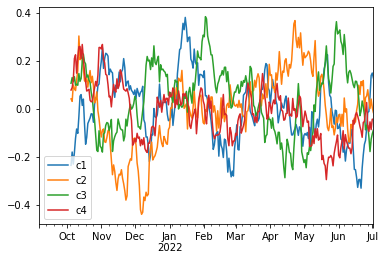

In [230]:
df.rolling(30).mean().plot()

<AxesSubplot:>

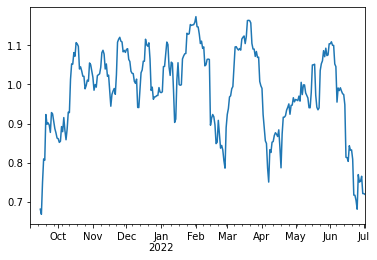

In [231]:
df.c1.rolling(30, min_periods = 10).std().plot()

<AxesSubplot:>

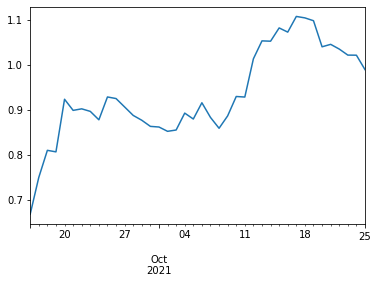

In [232]:
df.c1.rolling(30, min_periods = 10).std()[10:50].plot()

<AxesSubplot:>

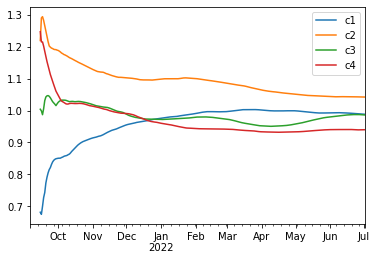

In [233]:
df.rolling(60, min_periods = 10).std().expanding().mean().plot()

<AxesSubplot:>

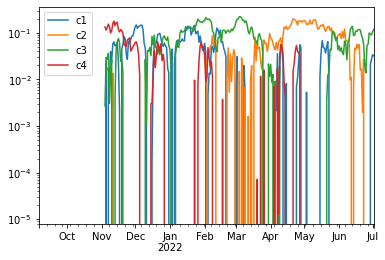

In [234]:
df.rolling(60).mean().plot(logy = True)

<AxesSubplot:>

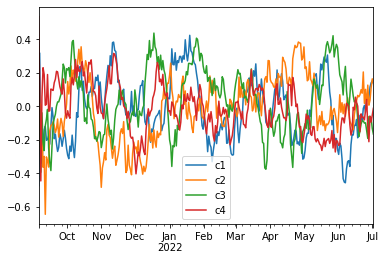

In [235]:
df.rolling('20D').mean().plot()

<AxesSubplot:>

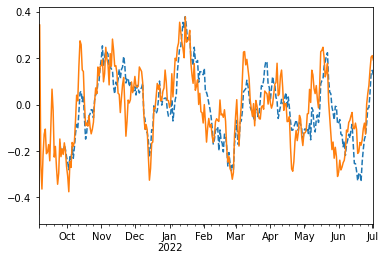

In [236]:
df.c1.rolling(30, min_periods = 20).mean().plot(style = '--', label = 'Simple NA')

df.c1.ewm(span=30).mean().plot(style = '-', label = 'EWMA')

<AxesSubplot:>

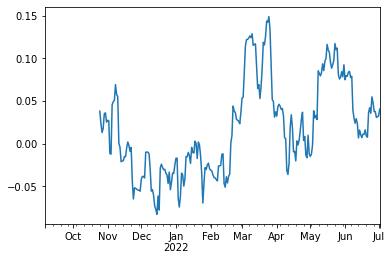

In [237]:
df.c1.rolling(100, min_periods = 50).corr(df.c3).plot()

## 데이터 읽기 및 저장


|함수|설명(어떤 데이터 읽는지|
|-----|-----------------------|
|`read_csv`|파일, URL, 객체(기본 구분자 ,)|
|`read_table`|파일, URL, 객체(기본 구분자 \t)|
|`read_fwf`|고정폭 컬럼 형식(구분자 없는 데이터)|
|`read_clipboard`|클립보드. 웹페이지에 있는 표를 읽어올 때 유용|
|`read_excel`|엑셀 파일(xls, xlsx)에서 표 형식|
|`read_hdf`|Pandas에서 저장한 HDFS 파일|
|`read_html`|HTML 문서 내의 모든 테이블|
|`read_json`|JSON|
|`read_msgpack`|메시지팩 바이너리 포맷으로 인코딩된 pandas 데이터|
|`read_pickle`|파이썬 피클 포맷|
|`read_sas`|SAS 시스템의 사용자 정의 저장 포맷|
|`read_sql`|SQL 질의 결과를 DataFrame 형식으로 읽기|
|`read_stata`| Stata 파일|
|`read_feather`|Feather 바이너리 파일|

### 텍스트 파일 읽기/쓰기

- pd.read_csv('파일.csv', header = None)
- pd.read_csv('파일.csv', names =[원하는 컬럼명], index_col = '원하는 컬럼')
- pd.read_csv('파일.csv', skiprows = [안쓰는 행])
- pd.read_csv(nrows = 행 갯수)

- df.to_csv('결과.csv')

In [ ]:
pd.read_table('파일.txt', seq = '\s+')  # 공백 하나

## 데이터 정제

### 누락값 처리

* 대부분의 실제 데이터들은 정제되지 않고 누락값들이 존재
* 서로 다른 데이터들은 다른 형태의 결측을 가짐
* 결측 데이터는 `null`, `NaN`, `NA`로 표기

#### None: 파이썬 누락 데이터

In [238]:
a = np.array([1, 2, None, 4, 5])
a  #sum 안됨

array([1, 2, None, 4, 5], dtype=object)

#### NaN: 누락된 수치 데이터

In [240]:
a = np.array([1, 2, np.nan, 4, 5])
a.dtype

dtype('float64')

In [242]:
a.sum()

nan

In [244]:
np.nansum(a), np.nanmax(a)

(12.0, 5.0)

In [245]:
pd.Series([1, 2, np.nan, 4, None])

0    1.0
1    2.0
2    NaN
3    4.0
4    NaN
dtype: float64

In [247]:
s = pd.Series(range(5), dtype = int)
s[0] = None
s[3] = np.nan
s

0    NaN
1    1.0
2    2.0
3    NaN
4    4.0
dtype: float64

In [250]:
s = pd.Series([True, False, None, np.nan])
s

0     True
1    False
2     None
3      NaN
dtype: object

In [251]:
s = pd.Series([1, 2, np.nan, 'String', None])
s

0         1
1         2
2       NaN
3    String
4      None
dtype: object

In [252]:
s.isnull()

0    False
1    False
2     True
3    False
4     True
dtype: bool

In [253]:
s[s.notnull()]

0         1
1         2
3    String
dtype: object

In [254]:
s.dropna()

0         1
1         2
3    String
dtype: object

In [255]:
df[3] = np.nan
df

,c1,c2,c3,c4,3
2021-09-06,-0.472953,0.308159,0.156279,0.536433,NaN
2021-09-07,1.111061,-0.268045,-0.242624,-0.275404,NaN
2021-09-08,-1.351815,-0.018692,-1.091674,-1.594905,NaN
2021-09-09,-0.641386,-0.537503,1.027350,1.554801,NaN
2021-09-10,0.284025,-1.297871,-0.924524,0.935901,NaN
...,...,...,...,...,...
2022-06-28,0.593486,-1.308142,0.260318,-1.008175,NaN
2022-06-29,1.123092,-0.178188,-0.752838,2.184568,NaN
2022-06-30,1.010090,0.507162,0.115573,-0.082886,NaN
2022-07-01,0.304925,-0.391710,0.361010,-0.016938,NaN


In [256]:
df.dropna(axis = 'columns', how = 'all')

,c1,c2,c3,c4
2021-09-06,-0.472953,0.308159,0.156279,0.536433
2021-09-07,1.111061,-0.268045,-0.242624,-0.275404
2021-09-08,-1.351815,-0.018692,-1.091674,-1.594905
2021-09-09,-0.641386,-0.537503,1.027350,1.554801
2021-09-10,0.284025,-1.297871,-0.924524,0.935901
...,...,...,...,...
2022-06-28,0.593486,-1.308142,0.260318,-1.008175
2022-06-29,1.123092,-0.178188,-0.752838,2.184568
2022-06-30,1.010090,0.507162,0.115573,-0.082886
2022-07-01,0.304925,-0.391710,0.361010,-0.016938


In [257]:
df.dropna(axis = 'rows', thresh = 3)

,c1,c2,c3,c4,3
2021-09-06,-0.472953,0.308159,0.156279,0.536433,NaN
2021-09-07,1.111061,-0.268045,-0.242624,-0.275404,NaN
2021-09-08,-1.351815,-0.018692,-1.091674,-1.594905,NaN
2021-09-09,-0.641386,-0.537503,1.027350,1.554801,NaN
2021-09-10,0.284025,-1.297871,-0.924524,0.935901,NaN
...,...,...,...,...,...
2022-06-28,0.593486,-1.308142,0.260318,-1.008175,NaN
2022-06-29,1.123092,-0.178188,-0.752838,2.184568,NaN
2022-06-30,1.010090,0.507162,0.115573,-0.082886,NaN
2022-07-01,0.304925,-0.391710,0.361010,-0.016938,NaN


In [258]:
s

0         1
1         2
2       NaN
3    String
4      None
dtype: object

In [259]:
s.fillna(0)

0         1
1         2
2         0
3    String
4         0
dtype: object

In [261]:
s.fillna(method = 'ffill')

0         1
1         2
2         2
3    String
4    String
dtype: object

In [262]:
s.fillna(method = 'bfill')

0         1
1         2
2    String
3    String
4      None
dtype: object

In [265]:
df.tail()

,c1,c2,c3,c4,3
2022-06-28,0.593486,-1.308142,0.260318,-1.008175,NaN
2022-06-29,1.123092,-0.178188,-0.752838,2.184568,NaN
2022-06-30,1.010090,0.507162,0.115573,-0.082886,NaN
2022-07-01,0.304925,-0.391710,0.361010,-0.016938,NaN
2022-07-02,-0.088061,-0.349618,0.382426,0.430081,NaN


In [267]:
df.fillna(method = 'ffill', axis = 1)

,c1,c2,c3,c4,3
2021-09-06,-0.472953,0.308159,0.156279,0.536433,0.536433
2021-09-07,1.111061,-0.268045,-0.242624,-0.275404,-0.275404
2021-09-08,-1.351815,-0.018692,-1.091674,-1.594905,-1.594905
2021-09-09,-0.641386,-0.537503,1.027350,1.554801,1.554801
2021-09-10,0.284025,-1.297871,-0.924524,0.935901,0.935901
...,...,...,...,...,...
2022-06-28,0.593486,-1.308142,0.260318,-1.008175,-1.008175
2022-06-29,1.123092,-0.178188,-0.752838,2.184568,2.184568
2022-06-30,1.010090,0.507162,0.115573,-0.082886,-0.082886
2022-07-01,0.304925,-0.391710,0.361010,-0.016938,-0.016938


### 중복 제거

In [268]:
df = pd.DataFrame({'cd' : ['a', 'b', 'c'] * 2 + ['b'] + ['c'],
                  'c2' : [1, 2, 1, 1, 2, 3, 3, 4]})
df

,cd,c2
0,a,1
1,b,2
2,c,1
3,a,1
4,b,2
5,c,3
6,b,3
7,c,4


In [269]:
df.duplicated()

0    False
1    False
2    False
3     True
4     True
5    False
6    False
7    False
dtype: bool

In [271]:
df.drop_duplicates()

,cd,c2
0,a,1
1,b,2
2,c,1
5,c,3
6,b,3
7,c,4


### 값 치환

In [272]:
s = pd.Series([1., 2., -999., 3., -1000., 4.])
s

0       1.0
1       2.0
2    -999.0
3       3.0
4   -1000.0
5       4.0
dtype: float64

In [275]:
s.replace([-999, -1000], [np.nan, 0])

0    1.0
1    2.0
2    NaN
3    3.0
4    0.0
5    4.0
dtype: float64

## 참고문헌

* Pandas 사이트: https://pandas.pydata.org/
* Jake VanderPlas, "Python Data Science Handbook", O'Reilly
* Wes Mckinney, "Python for Data Analysis", O'Reilly